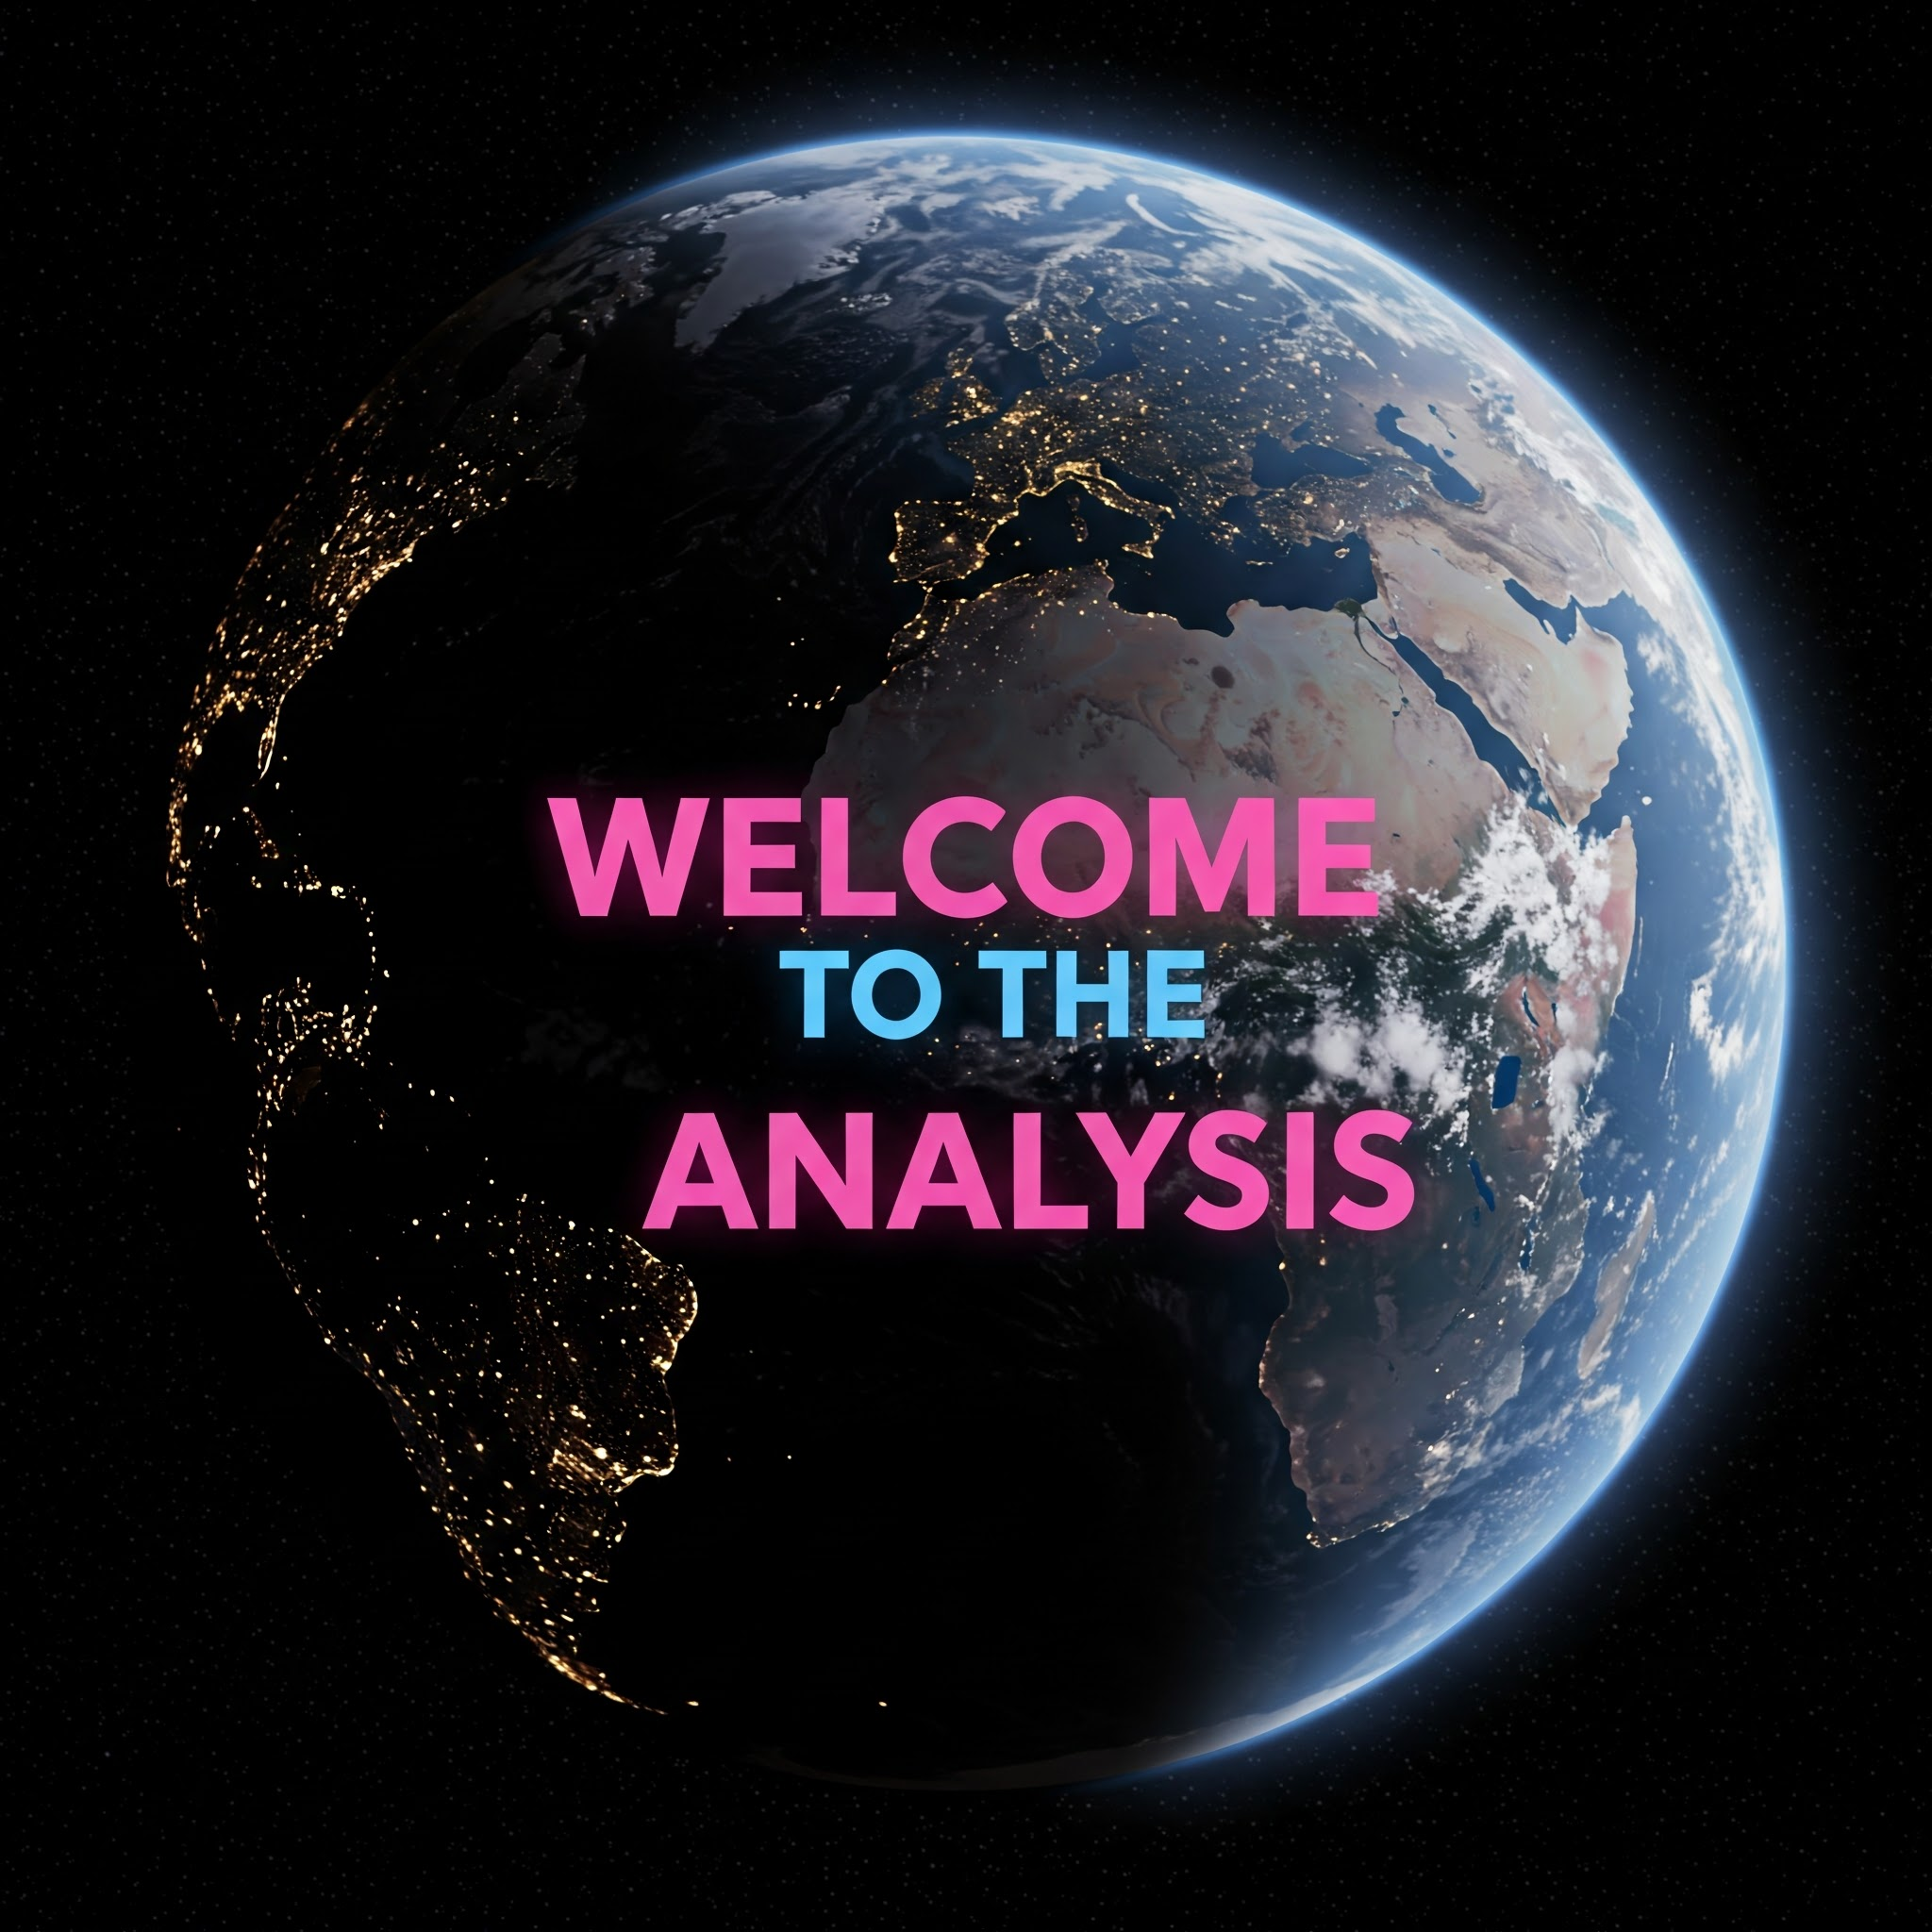

## About the dataset:

#### **Gapminder dataset, widely used for exploring global development indicators over time**.


Description of Dataset

- Country: Name of the country.

- Year: Year of observation.

- fertility: Average number of children per woman.

- life: Life expectancy at birth (years).

- population: Total population.

- child_mortality: Number of deaths of children under five per 1,000 live births.

- gdp: Gross Domestic Product per capita (often in USD).

- region: Geographic region or continent.

## Problem Statement


To analyze global development trends by exploring and summarizing the relationships between fertility, life expectancy, child mortality, GDP per capita, and population across countries and regions over time, using the provided dataset.


### **1. Data Cleaning**

    a. Import the Data:
  Load the dataset into your analysis environment .

    b. Inspect Data Structure:
  Examine data types, column names, and sample records.

    c. Handle Missing Values:
  Identify and address missing or null values via imputation or removal.

    d. Remove Duplicates:
  Check for and remove any duplicate rows.

    e. Correct Data Types:
  Ensure columns like Year are integers, population is numeric, etc.

    f. Standardize Categorical Values:
  Ensure consistent naming for countries and regions.

    g. Outlier Detection:
  Identify and handle outliers in numerical columns.




---





### **2. Exploratory Data Analysis (EDA)**

    a. Univariate Analysis
  Summarize each variable (mean, median, min, max, standard deviation).

  Visualize distributions (histograms, boxplots) for fertility, life expectancy, GDP, etc.

    b. Bivariate Analysis
  Explore relationships between pairs of variables (e.g., fertility vs. life expectancy, GDP vs. child mortality).

  Use scatterplots, correlation matrices, and pairplots.

    c. Temporal Trends
  Analyze how indicators change over time globally and by region.

  Line plots showing trends in life expectancy, fertility, or GDP per capita over years.

    d. Regional Comparisons
  Compare indicators across different regions.

  Bar plots or boxplots grouped by region.

    e. Aggregation Operations


  Calculate mean, median, sum, or other statistics for indicators grouped by year, region, or country.

  Example: Average life expectancy per region per decade.


    f. Population Insights

  Explore how population size relates to other indicators.

  Identify the most and least populous countries/regions over time.

    g. Child Mortality Analysis

  Examine trends and patterns in child mortality, and its relationship with GDP and life expectancy.

    h. Summary Tables and Visualizations

Create summary tables for key findings.

Use heatmaps, maps, or other visuals for geographic insights.

Deliverables

* Cleaned and well-documented dataset.

* Summary statistics, aggregation tables, and visualizations for each variable.

* Insights on global and regional trends in development indicators.

* Clear documentation of all steps and findings.

## Lets Start the Exploratory data analysis

In [311]:
#Ignore the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pyspark.sql.functions import *
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="muted")


In [312]:
#lets start the spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('gapminder').getOrCreate()
spark

In [313]:
#lets examine data-types , column names and some sample records
df = spark.read.csv('gapminder_tidy.csv' , inferSchema='true', header='true')
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- fertility: double (nullable = true)
 |-- life: double (nullable = true)
 |-- population: double (nullable = true)
 |-- child_mortality: double (nullable = true)
 |-- gdp: double (nullable = true)
 |-- region: string (nullable = true)



In [314]:
#checking the column names
df.columns

['Country',
 'Year',
 'fertility',
 'life',
 'population',
 'child_mortality',
 'gdp',
 'region']

In [315]:
#checking data-type of each column
df.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('fertility', 'double'),
 ('life', 'double'),
 ('population', 'double'),
 ('child_mortality', 'double'),
 ('gdp', 'double'),
 ('region', 'string')]

In [316]:
#lets see how it looks
df.show(5)

+-----------+----+---------+------+-----------+---------------+------+----------+
|    Country|Year|fertility|  life| population|child_mortality|   gdp|    region|
+-----------+----+---------+------+-----------+---------------+------+----------+
|Afghanistan|1964|    7.671|33.639|1.0474903E7|          339.7|1182.0|South Asia|
|Afghanistan|1965|    7.671|34.152|1.0697983E7|          334.1|1182.0|South Asia|
|Afghanistan|1966|    7.671|34.662|1.0927724E7|          328.7|1168.0|South Asia|
|Afghanistan|1967|    7.671| 35.17|1.1163656E7|          323.3|1173.0|South Asia|
|Afghanistan|1968|    7.671|35.674|1.1411022E7|          318.1|1187.0|South Asia|
+-----------+----+---------+------+-----------+---------------+------+----------+
only showing top 5 rows



In [317]:
#total rows
df.count()

10111

In [318]:
df.describe().show()

+-------+-----------+------------------+-----------------+------------------+-------------------+-----------------+------------------+------------------+
|summary|    Country|              Year|        fertility|              life|         population|  child_mortality|               gdp|            region|
+-------+-----------+------------------+-----------------+------------------+-------------------+-----------------+------------------+------------------+
|  count|      10111|             10111|            10100|             10111|              10108|             9210|              9000|             10111|
|   mean|       NULL|1988.5145880723965|4.028718761955669| 64.07859968299091|2.560448031559161E7|80.83450488599334|12746.916666666666|              NULL|
| stddev|       NULL|14.430849463812343|2.013967511764119|11.122778564950746|1.032383024935289E8| 79.2209420722028| 17797.80995341417|              NULL|
|    min|Afghanistan|              1964|            0.836|               6.0

In [319]:
#we can also convert to pandas datafrma using
df.limit(5).toPandas()

Country  Year  fertility    life  population  child_mortality     gdp  \
0  Afghanistan  1964      7.671  33.639  10474903.0            339.7  1182.0   
1  Afghanistan  1965      7.671  34.152  10697983.0            334.1  1182.0   
2  Afghanistan  1966      7.671  34.662  10927724.0            328.7  1168.0   
3  Afghanistan  1967      7.671  35.170  11163656.0            323.3  1173.0   
4  Afghanistan  1968      7.671  35.674  11411022.0            318.1  1187.0   

       region  
0  South Asia  
1  South Asia  
2  South Asia  
3  South Asia  
4  South Asia

In [320]:
#lets check the missing values
from pyspark.sql.functions import col, sum

null_counts = df.select([sum(col(c).isNull().cast('int')).alias(c) for c in df.columns])
null_counts.show()


+-------+----+---------+----+----------+---------------+----+------+
|Country|Year|fertility|life|population|child_mortality| gdp|region|
+-------+----+---------+----+----------+---------------+----+------+
|      0|   0|       11|   0|         3|            901|1111|     0|
+-------+----+---------+----+----------+---------------+----+------+



In [321]:
#toal null percentage in each column
null_percentage = df.select([sum((col(c).isNull().cast('int') / df.count()) * 100 ).alias(c) for c in df.columns])
null_percentage.show()


+-------+----+-------------------+----+--------------------+----------------+------------------+------+
|Country|Year|          fertility|life|          population| child_mortality|               gdp|region|
+-------+----+-------------------+----+--------------------+----------------+------------------+------+
|    0.0| 0.0|0.10879240431213533| 0.0|0.029670655721491447|8.91108693502123|10.988032835525457|   0.0|
+-------+----+-------------------+----+--------------------+----------------+------------------+------+



In [322]:
#lets see how we can handle missing values

'''
For numerical column impute with median / mean as % of nulls is low , if high we would simply drop the column
for categorical column impute with mode

- Fertility column has  0.1 % nulls
- population column has 0.02 % nulls
- child mortaity and gdp have highest nulls 8.9 and 10.9%

All are numeric so we will use median.

'''

#lets find the median of the column
from pyspark.sql.functions import median

median_fertility = df.select(median(col("fertility"))).collect()[0][0]
median_population = df.select(median(col("population"))).collect()[0][0]
median_child_mortality = df.select(median(col("child_mortality"))).collect()[0][0]
median_gdp = df.select(median(col("gdp"))).collect()[0][0]


In [323]:
#filling nulls with median values

df = df.na.fill({'fertility' : median_fertility , "population" :median_population , 'child_mortality' :median_child_mortality
                 , 'gdp' : median_gdp})

In [324]:
#lets re-confirm that nulls have been removed
null_counts = df.select( [sum(col(c).isNull().cast('int')).alias(c) for c in df.columns])
null_counts.show()

+-------+----+---------+----+----------+---------------+---+------+
|Country|Year|fertility|life|population|child_mortality|gdp|region|
+-------+----+---------+----+----------+---------------+---+------+
|      0|   0|        0|   0|         0|              0|  0|     0|
+-------+----+---------+----+----------+---------------+---+------+



In [325]:
#lets check for duplicates

df.groupBy(df.columns).count().filter("count > 1").show()


+-------+----+---------+----+----------+---------------+---+------+-----+
|Country|Year|fertility|life|population|child_mortality|gdp|region|count|
+-------+----+---------+----+----------+---------------+---+------+-----+
+-------+----+---------+----+----------+---------------+---+------+-----+



In [326]:
#lets check categorical column country for distict count

df.select(col('Country')).distinct().count()

204

In [327]:
#lets check categorical column for naming concestencies

distinct_country_names = df.select(col('Country')).distinct().orderBy('Country')
distinct_country_names.show(204)

+--------------------+
|             Country|
+--------------------+
|         Afghanistan|
|             Albania|
|             Algeria|
|              Angola|
| Antigua and Barbuda|
|           Argentina|
|             Armenia|
|               Aruba|
|           Australia|
|             Austria|
|          Azerbaijan|
|             Bahamas|
|             Bahrain|
|          Bangladesh|
|            Barbados|
|             Belarus|
|             Belgium|
|              Belize|
|               Benin|
|              Bhutan|
|             Bolivia|
|Bosnia and Herzeg...|
|            Botswana|
|              Brazil|
|              Brunei|
|            Bulgaria|
|        Burkina Faso|
|             Burundi|
|            Cambodia|
|            Cameroon|
|              Canada|
|          Cape Verde|
|Central African Rep.|
|                Chad|
|     Channel Islands|
|               Chile|
|               China|
|            Colombia|
|             Comoros|
|    Congo, Dem. Rep.|
|         C

In [328]:
#lets rename the countries name which belong to same name
from pyspark.sql.functions import lower , when


df = df.withColumn(
    "Country",
    when(lower(col("Country")).like("%china%"), "China")
    .when(lower(col("Country")).like("%chinea%"), "China")
    .when(lower(col("Country")).like("%congo%") , 'Congo')
    .when(lower(col("Country")).like("%french%") , 'France')
    .when(lower(col('Country')).like("%guinea%") , "Guinea")
    .otherwise(col("Country"))
)

In [329]:
#lets check if changes took place
df.select(col('Country')).distinct().orderBy('Country').show(203)


+--------------------+
|             Country|
+--------------------+
|         Afghanistan|
|             Albania|
|             Algeria|
|              Angola|
| Antigua and Barbuda|
|           Argentina|
|             Armenia|
|               Aruba|
|           Australia|
|             Austria|
|          Azerbaijan|
|             Bahamas|
|             Bahrain|
|          Bangladesh|
|            Barbados|
|             Belarus|
|             Belgium|
|              Belize|
|               Benin|
|              Bhutan|
|             Bolivia|
|Bosnia and Herzeg...|
|            Botswana|
|              Brazil|
|              Brunei|
|            Bulgaria|
|        Burkina Faso|
|             Burundi|
|            Cambodia|
|            Cameroon|
|              Canada|
|          Cape Verde|
|Central African Rep.|
|                Chad|
|     Channel Islands|
|               Chile|
|               China|
|            Colombia|
|             Comoros|
|               Congo|
|          

In [330]:
# lets check the count of distinct regions

df.groupby('region').count().show()

+--------------------+-----+
|              region|count|
+--------------------+-----+
|          South Asia|  400|
|  Sub-Saharan Africa| 2500|
|Europe & Central ...| 2560|
| East Asia & Pacific| 1601|
|Middle East & Nor...| 1050|
|             America| 2000|
+--------------------+-----+



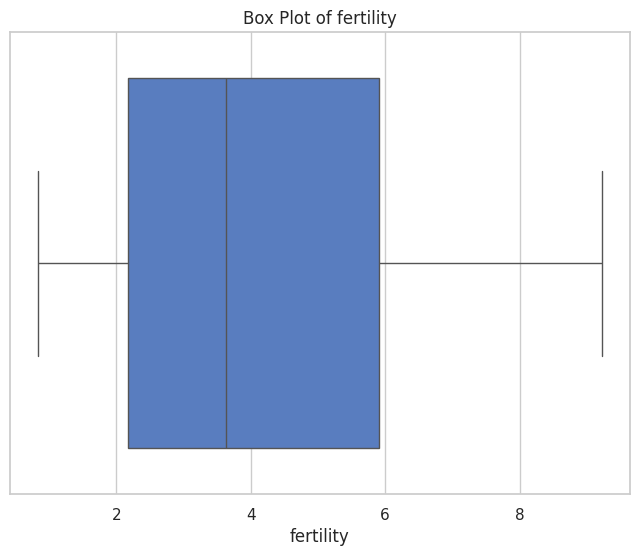

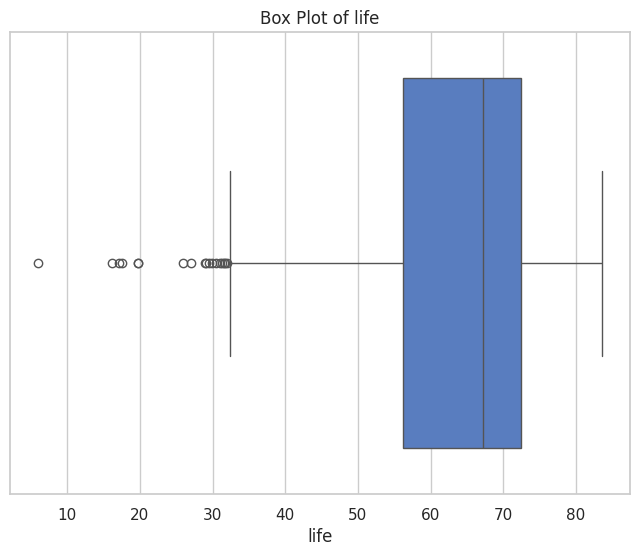

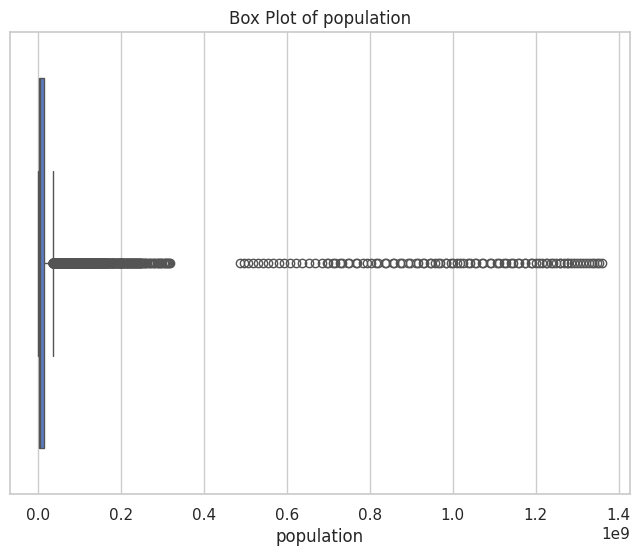

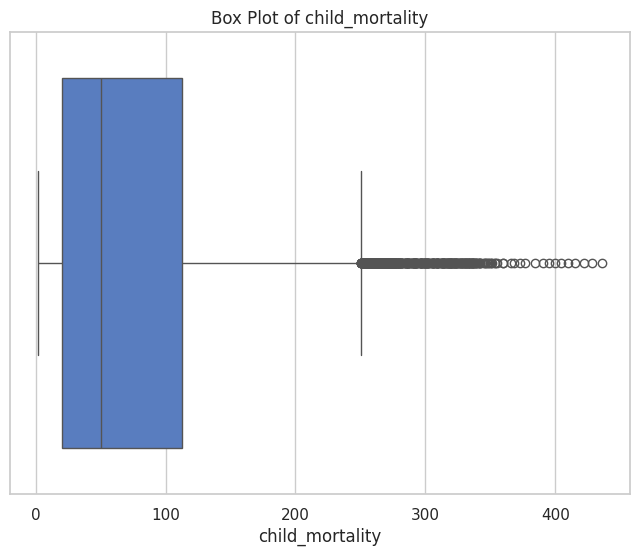

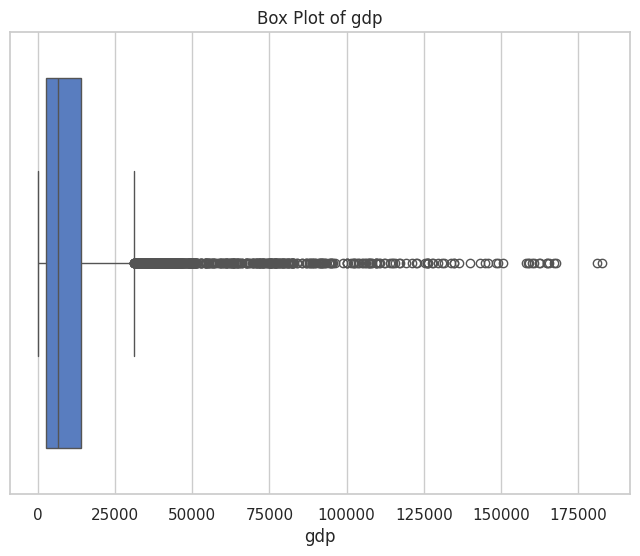

In [331]:
#lets check outliers in the numerical columns with the help of a box plot

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['fertility', 'life', 'population', 'child_mortality', 'gdp']
df_pd = df.select(num_cols).toPandas()

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_pd[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

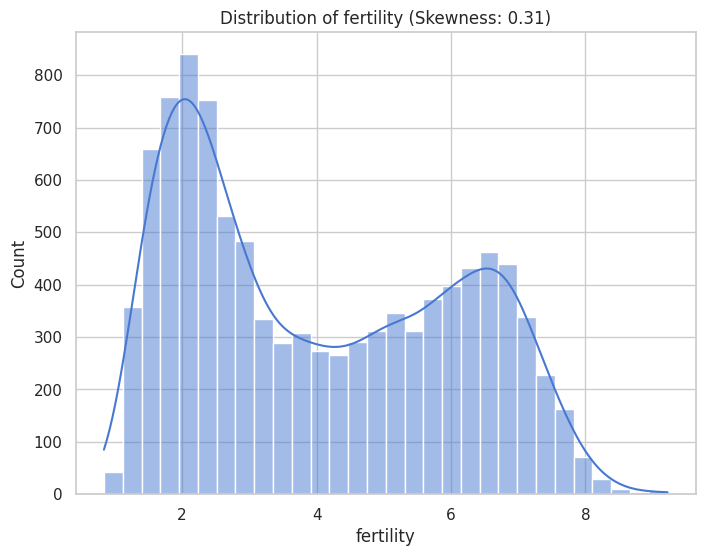

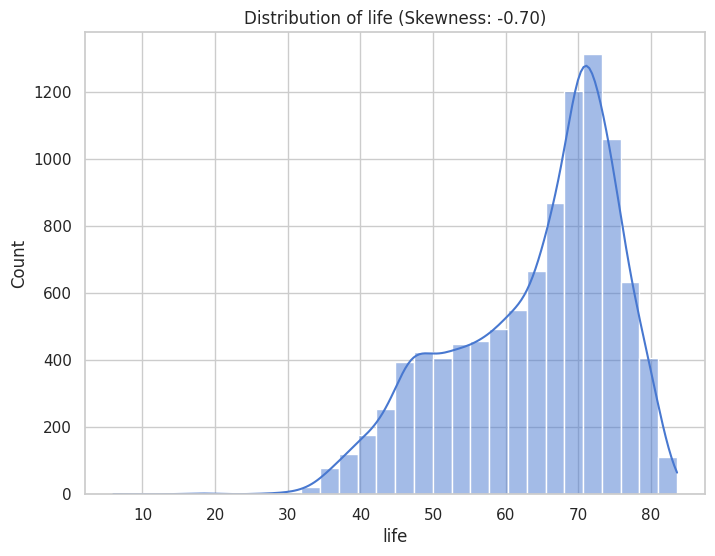

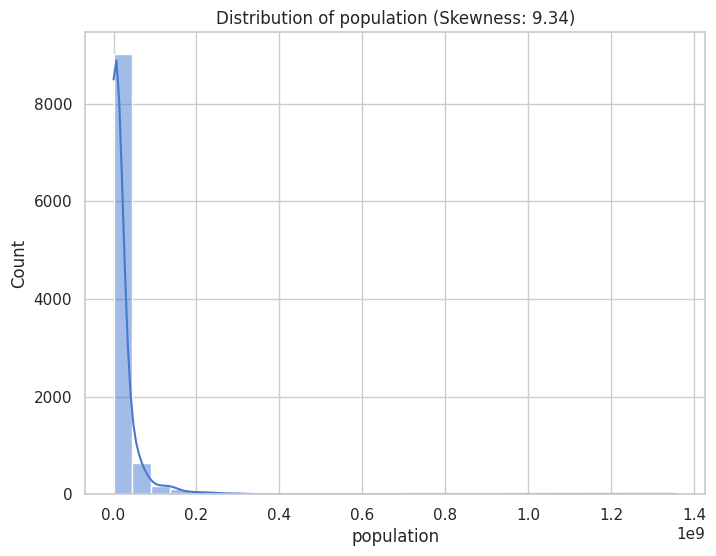

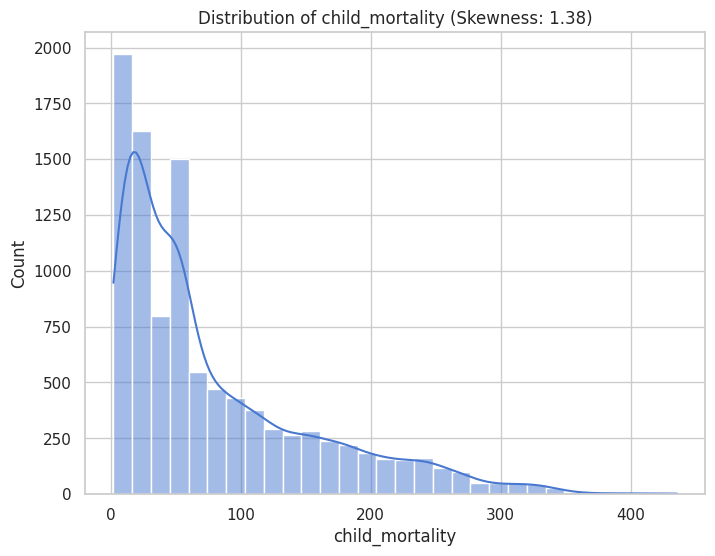

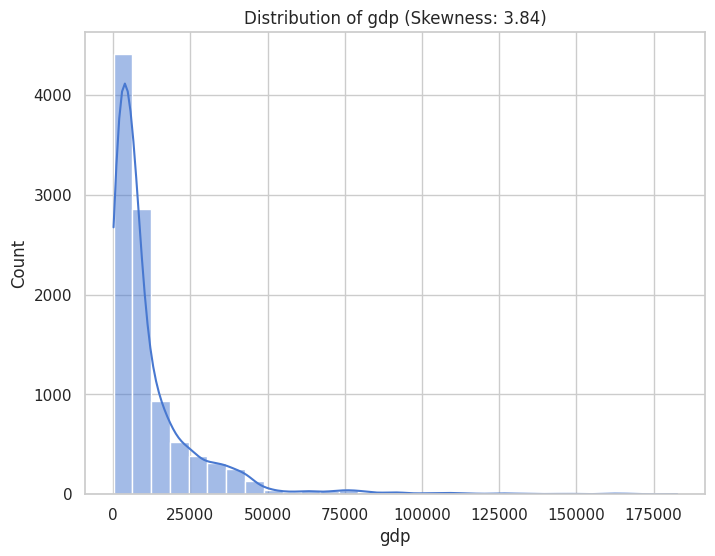

In [332]:
#lets check the skew of each column
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_pd[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Skewness: {df_pd[col].skew():.2f})')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()



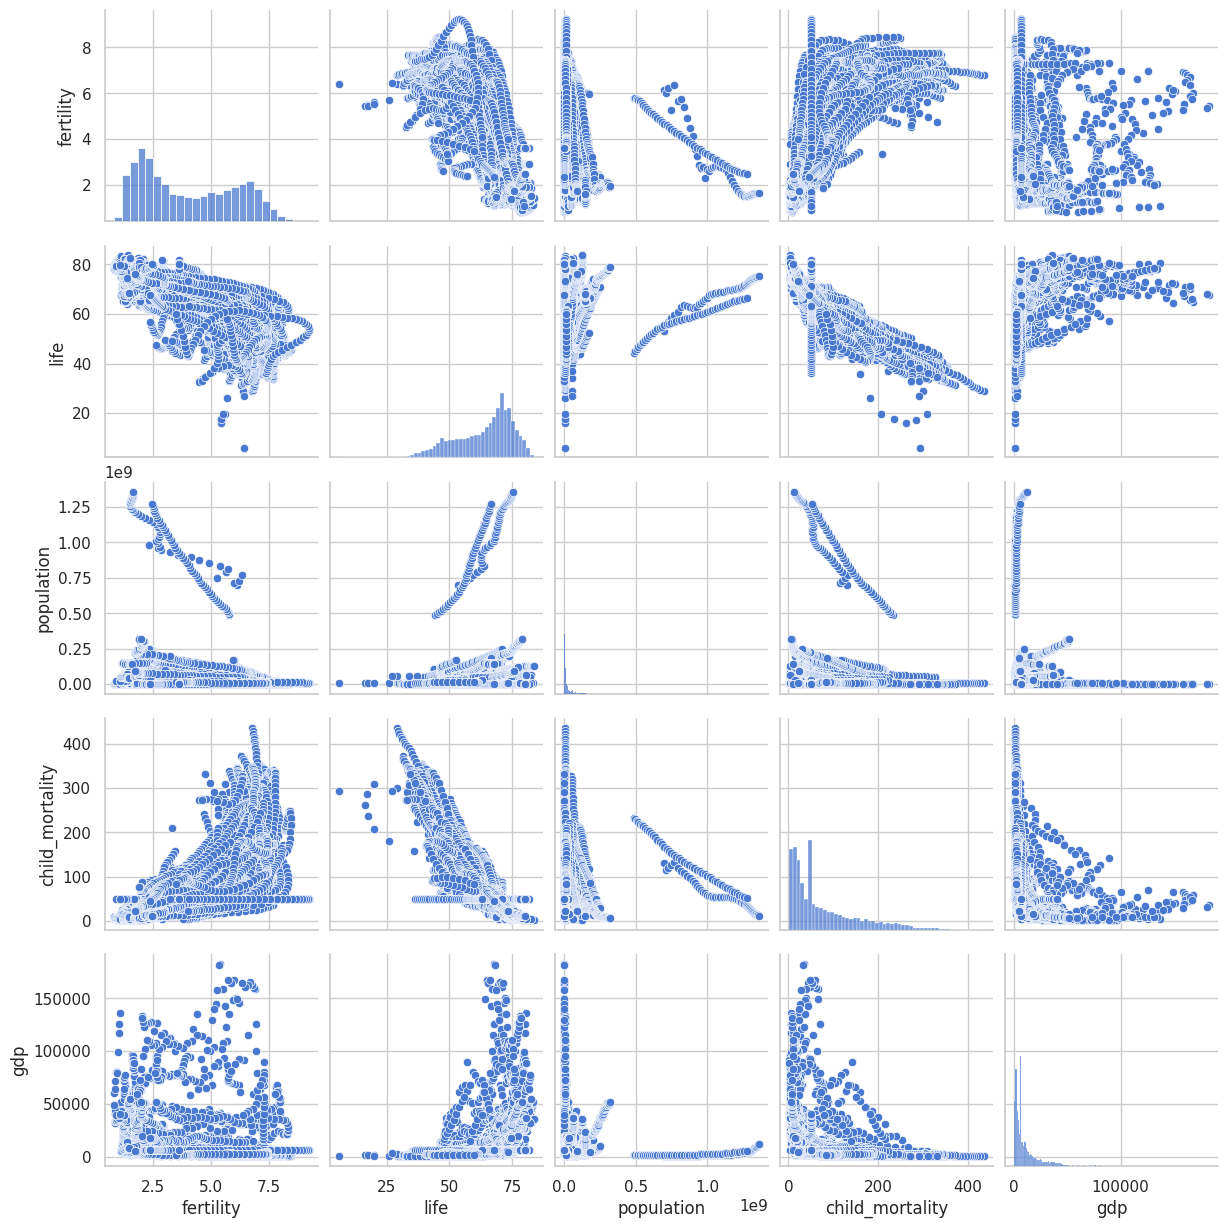

In [333]:
#lets check between different features how things look-like
sns.pairplot(df_pd)
plt.show()

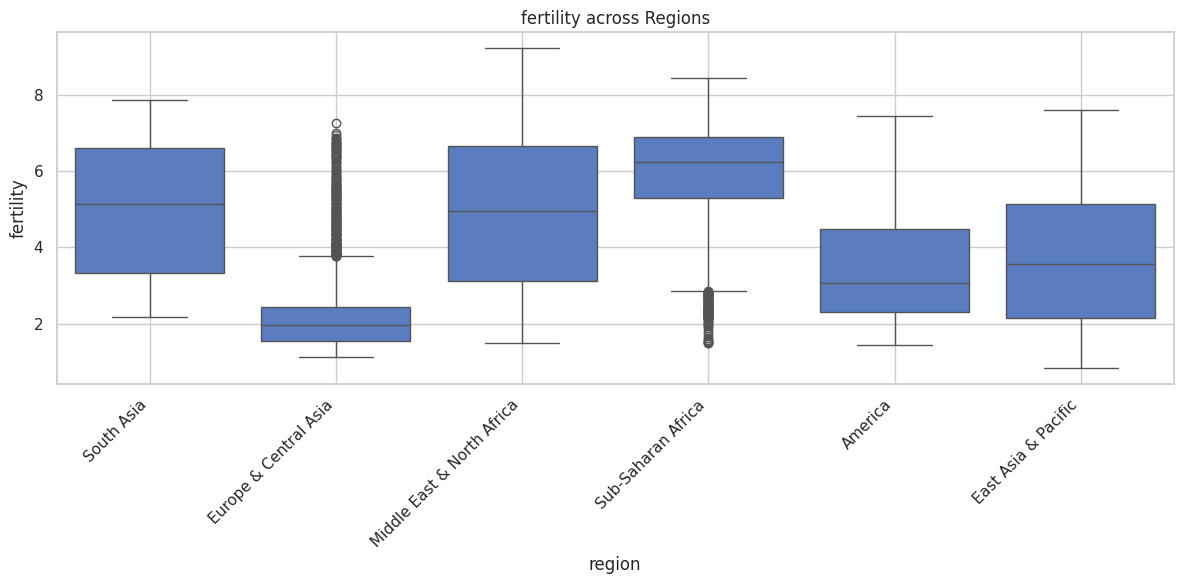

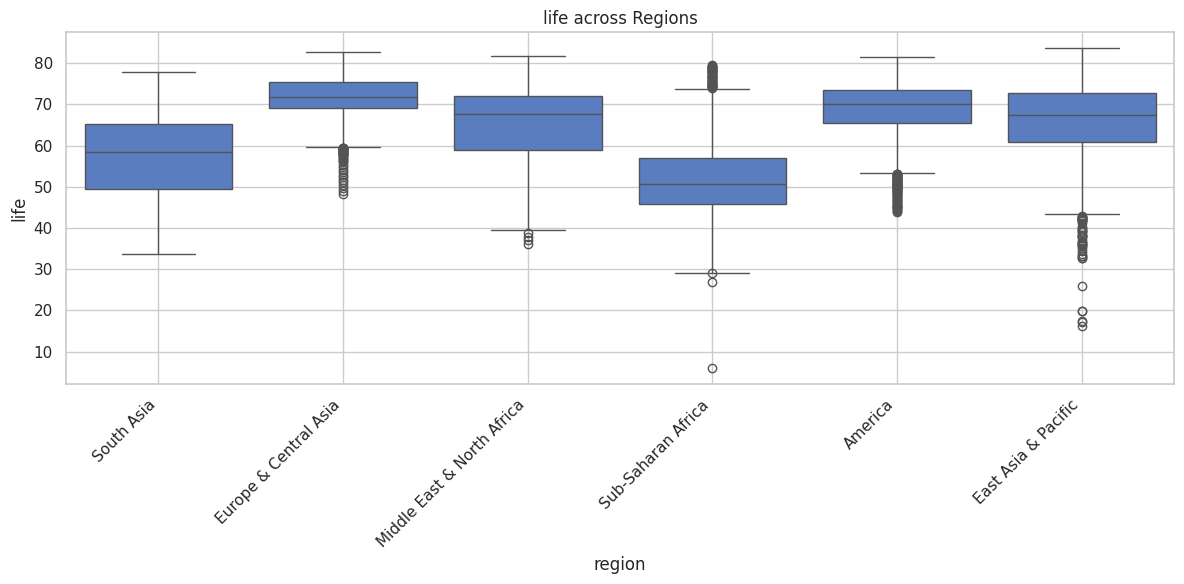

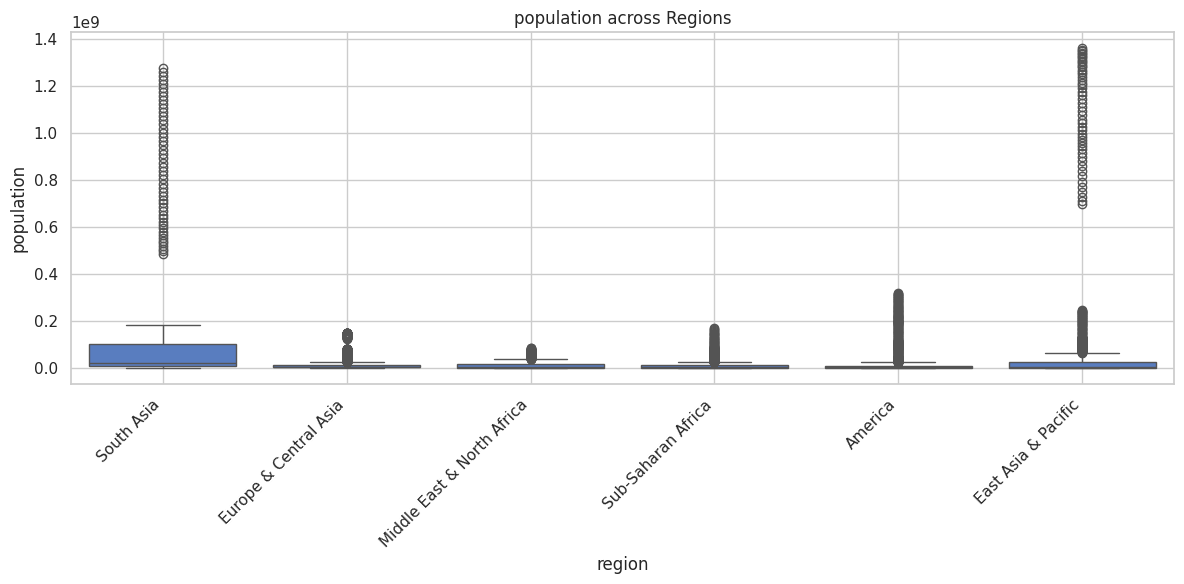

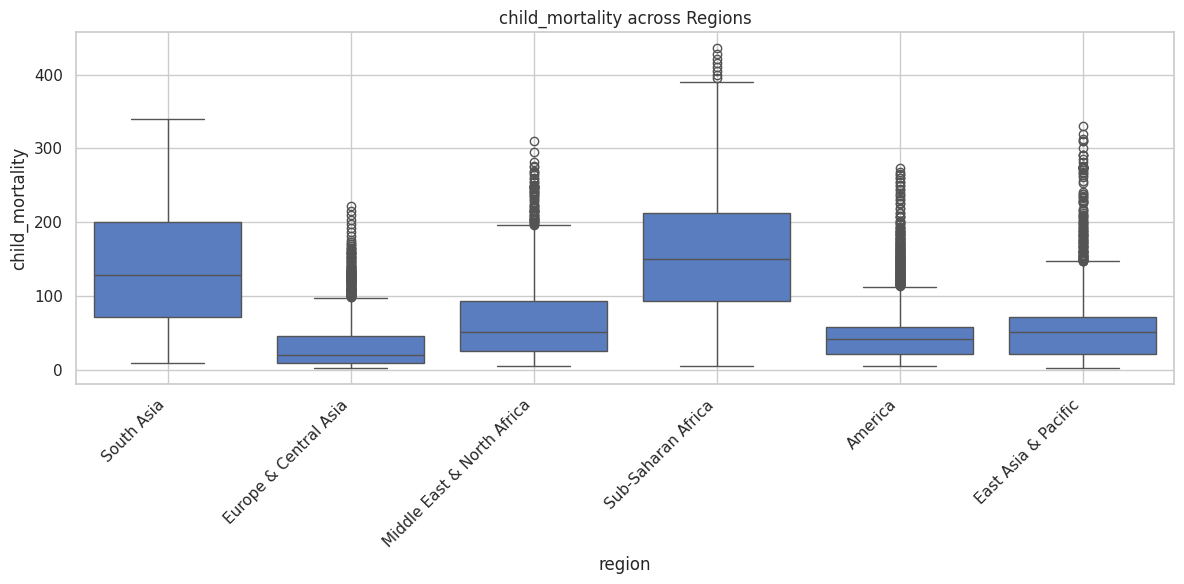

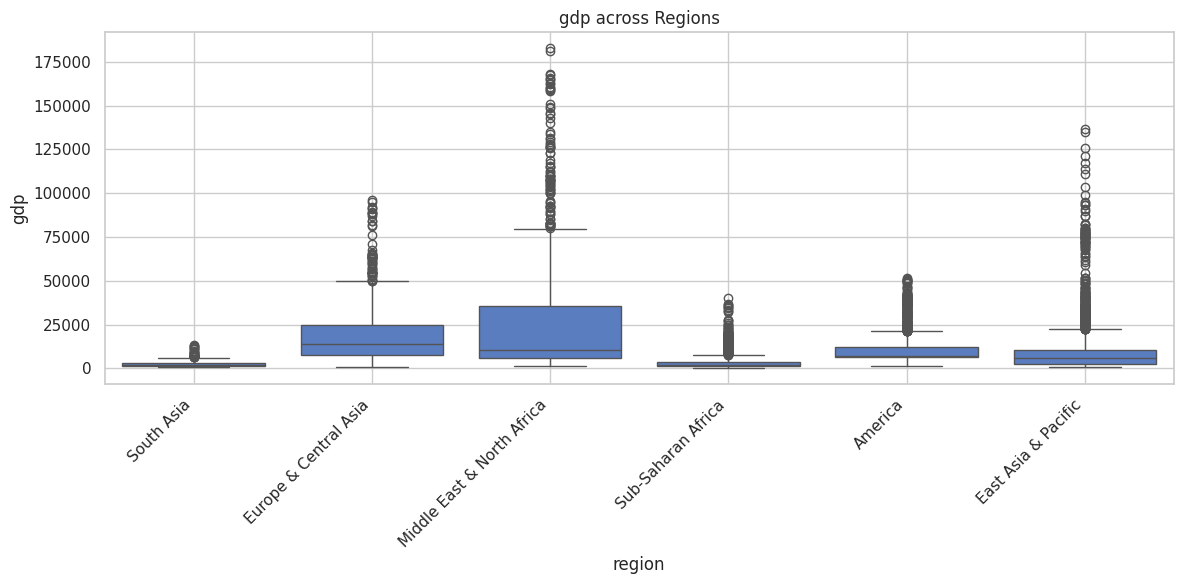

In [334]:
#lets check between region vs others

num_cols = ['fertility', 'life', 'population', 'child_mortality', 'gdp']
df_pd = df.select(['region'] + num_cols).toPandas()

for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_pd, x='region', y=col)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{col} across Regions')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


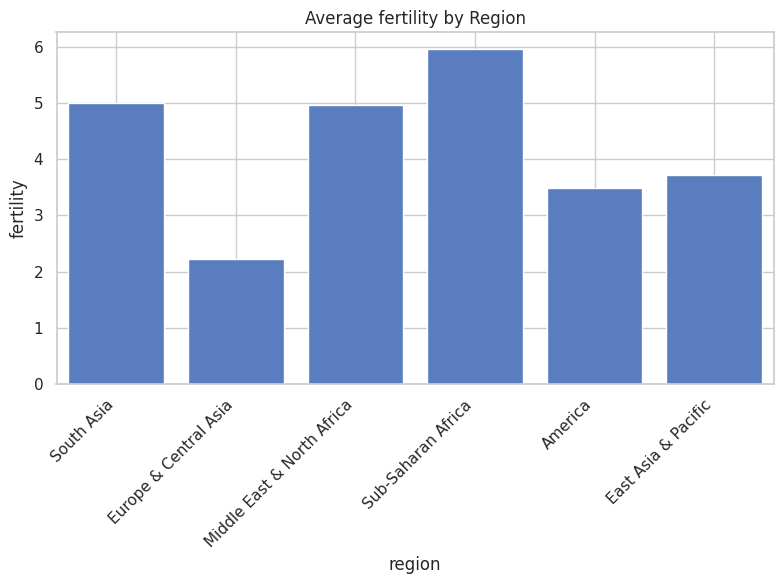

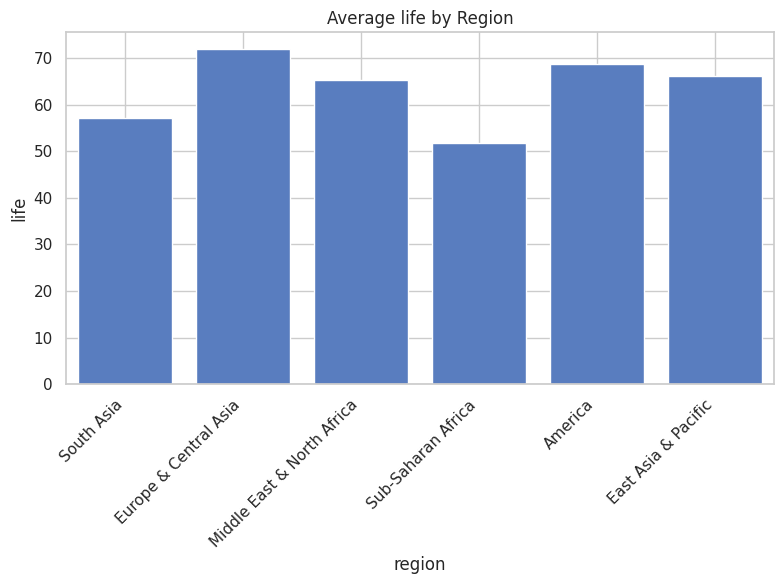

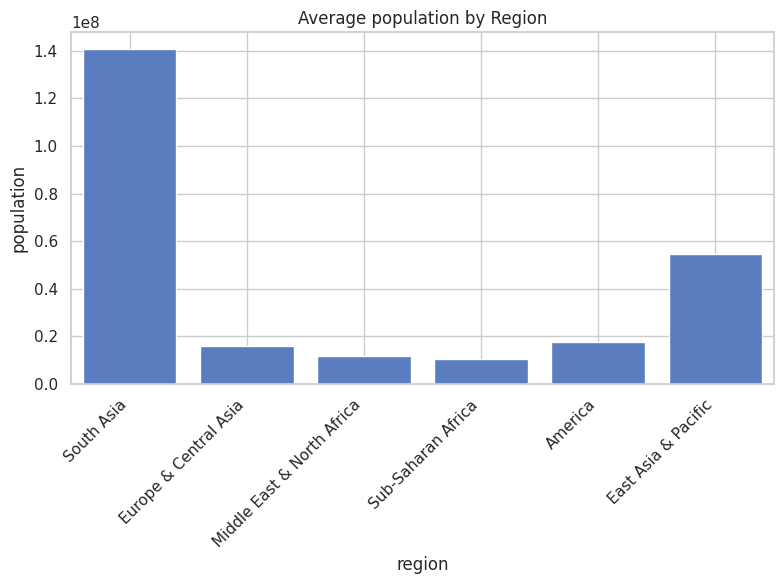

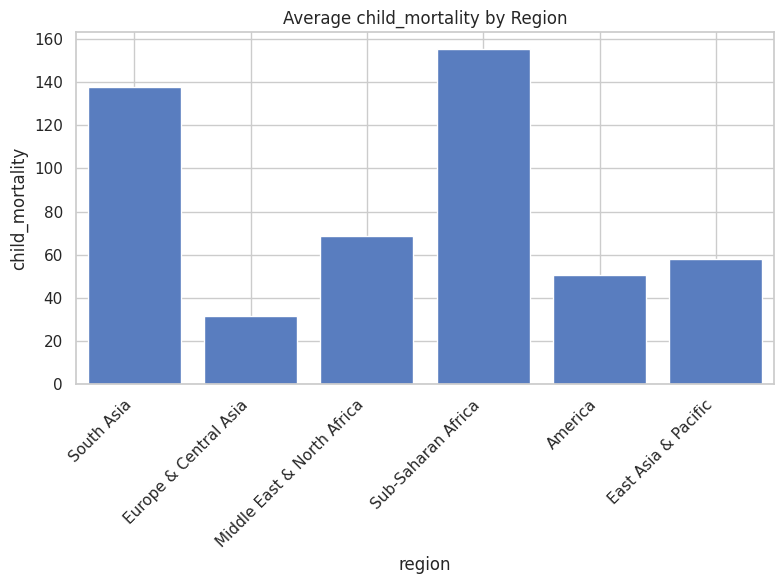

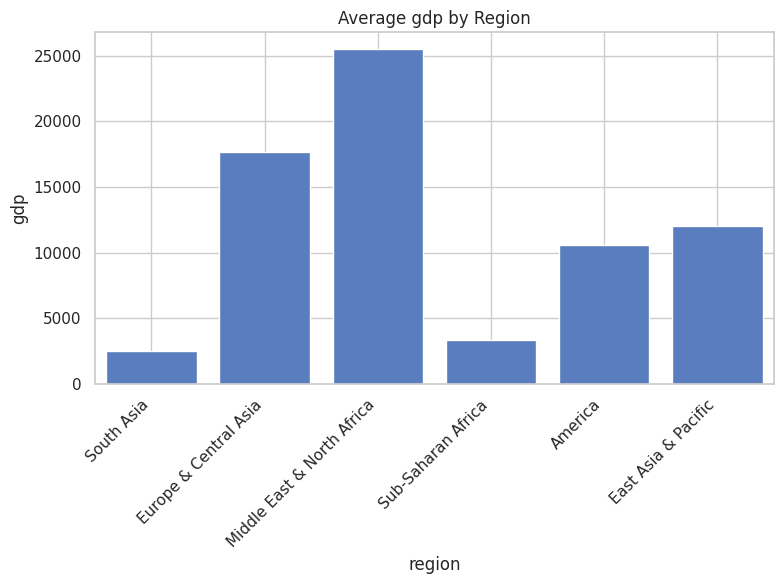

In [335]:

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_pd, x='region', y=col, estimator='mean',ci=None)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average {col} by Region')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


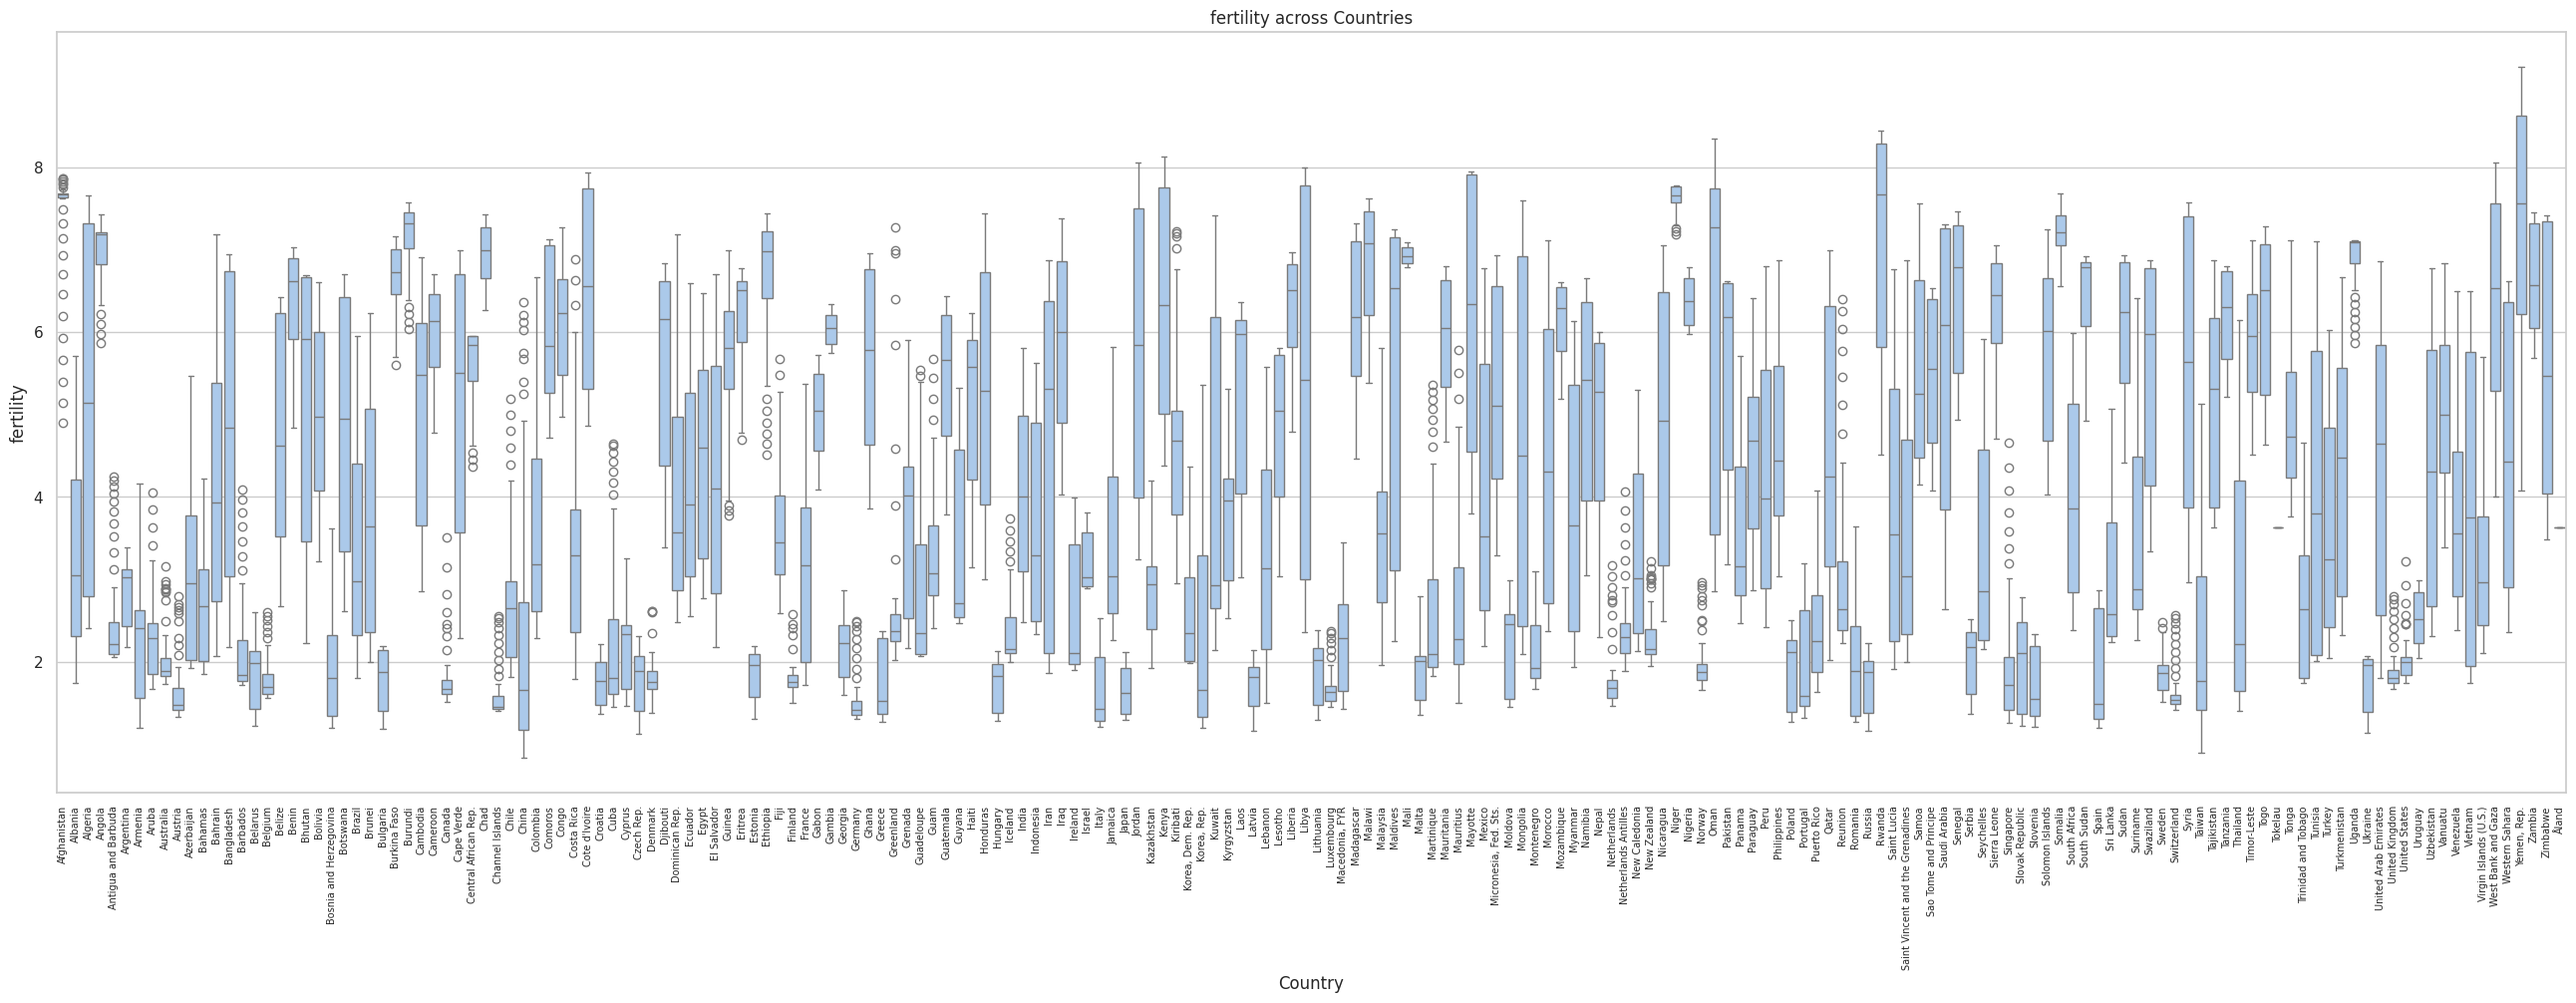

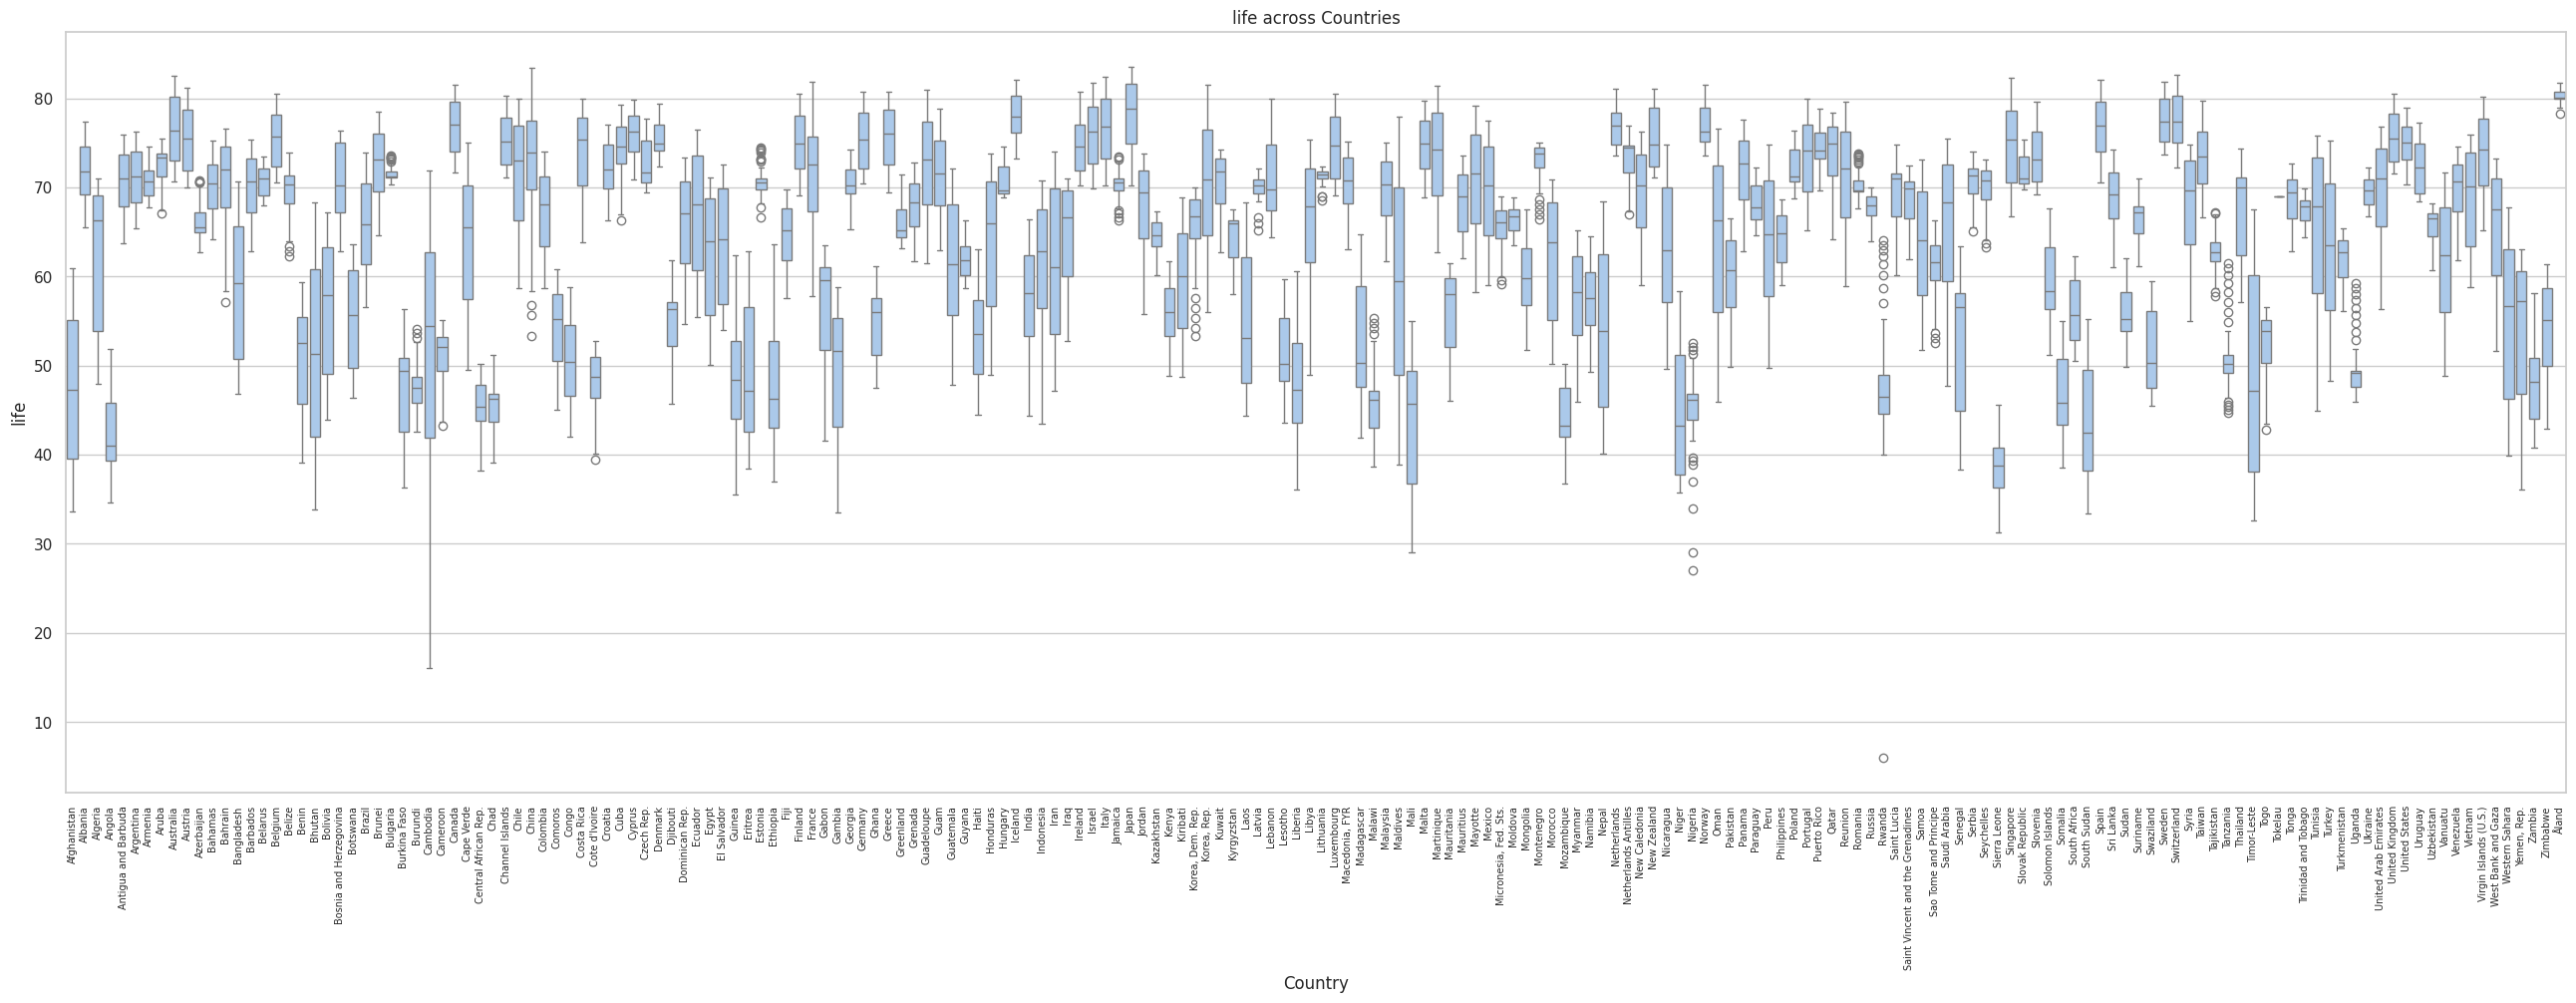

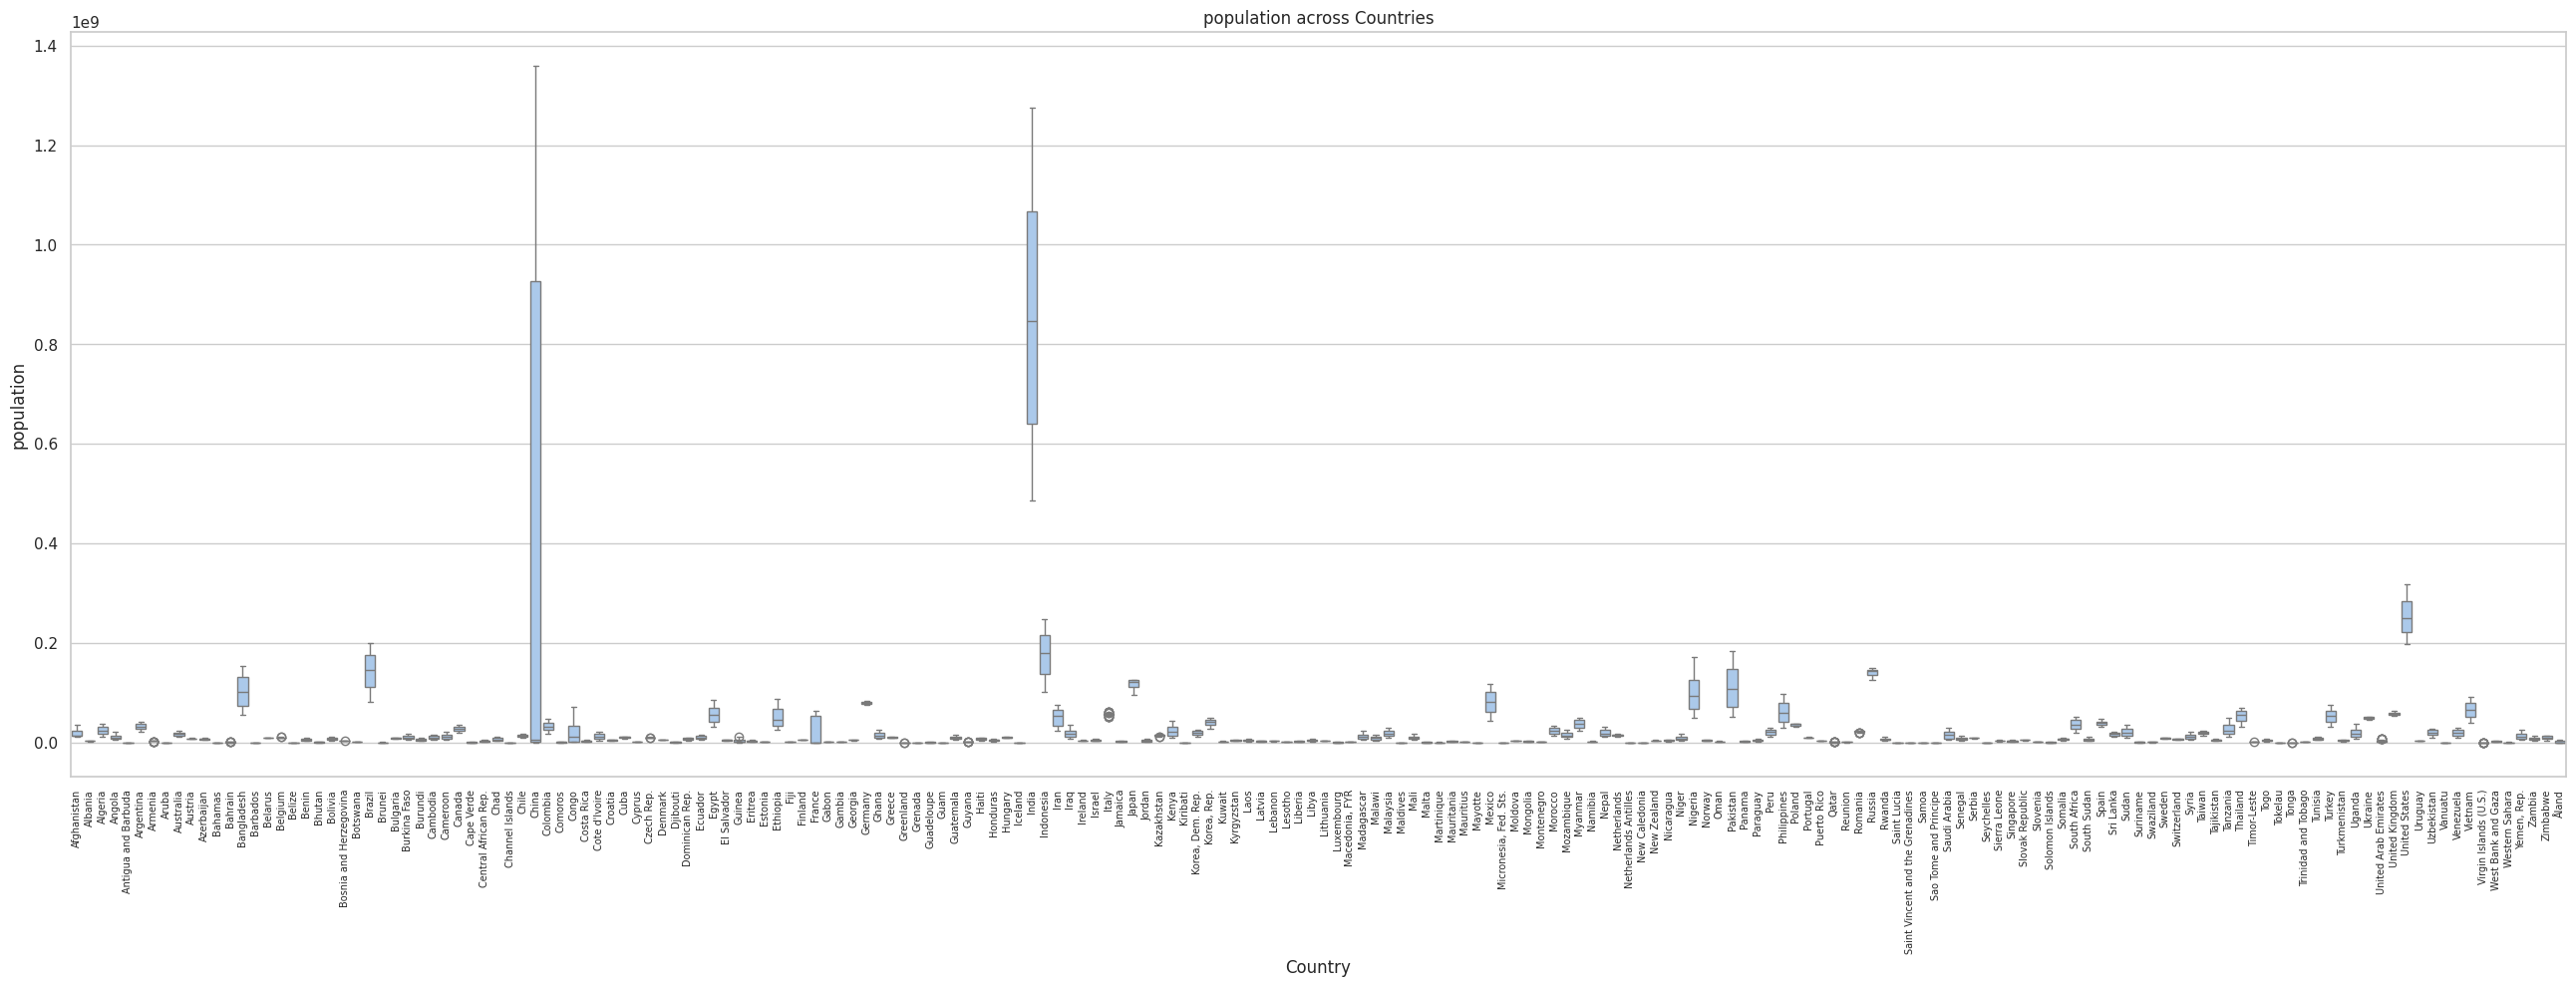

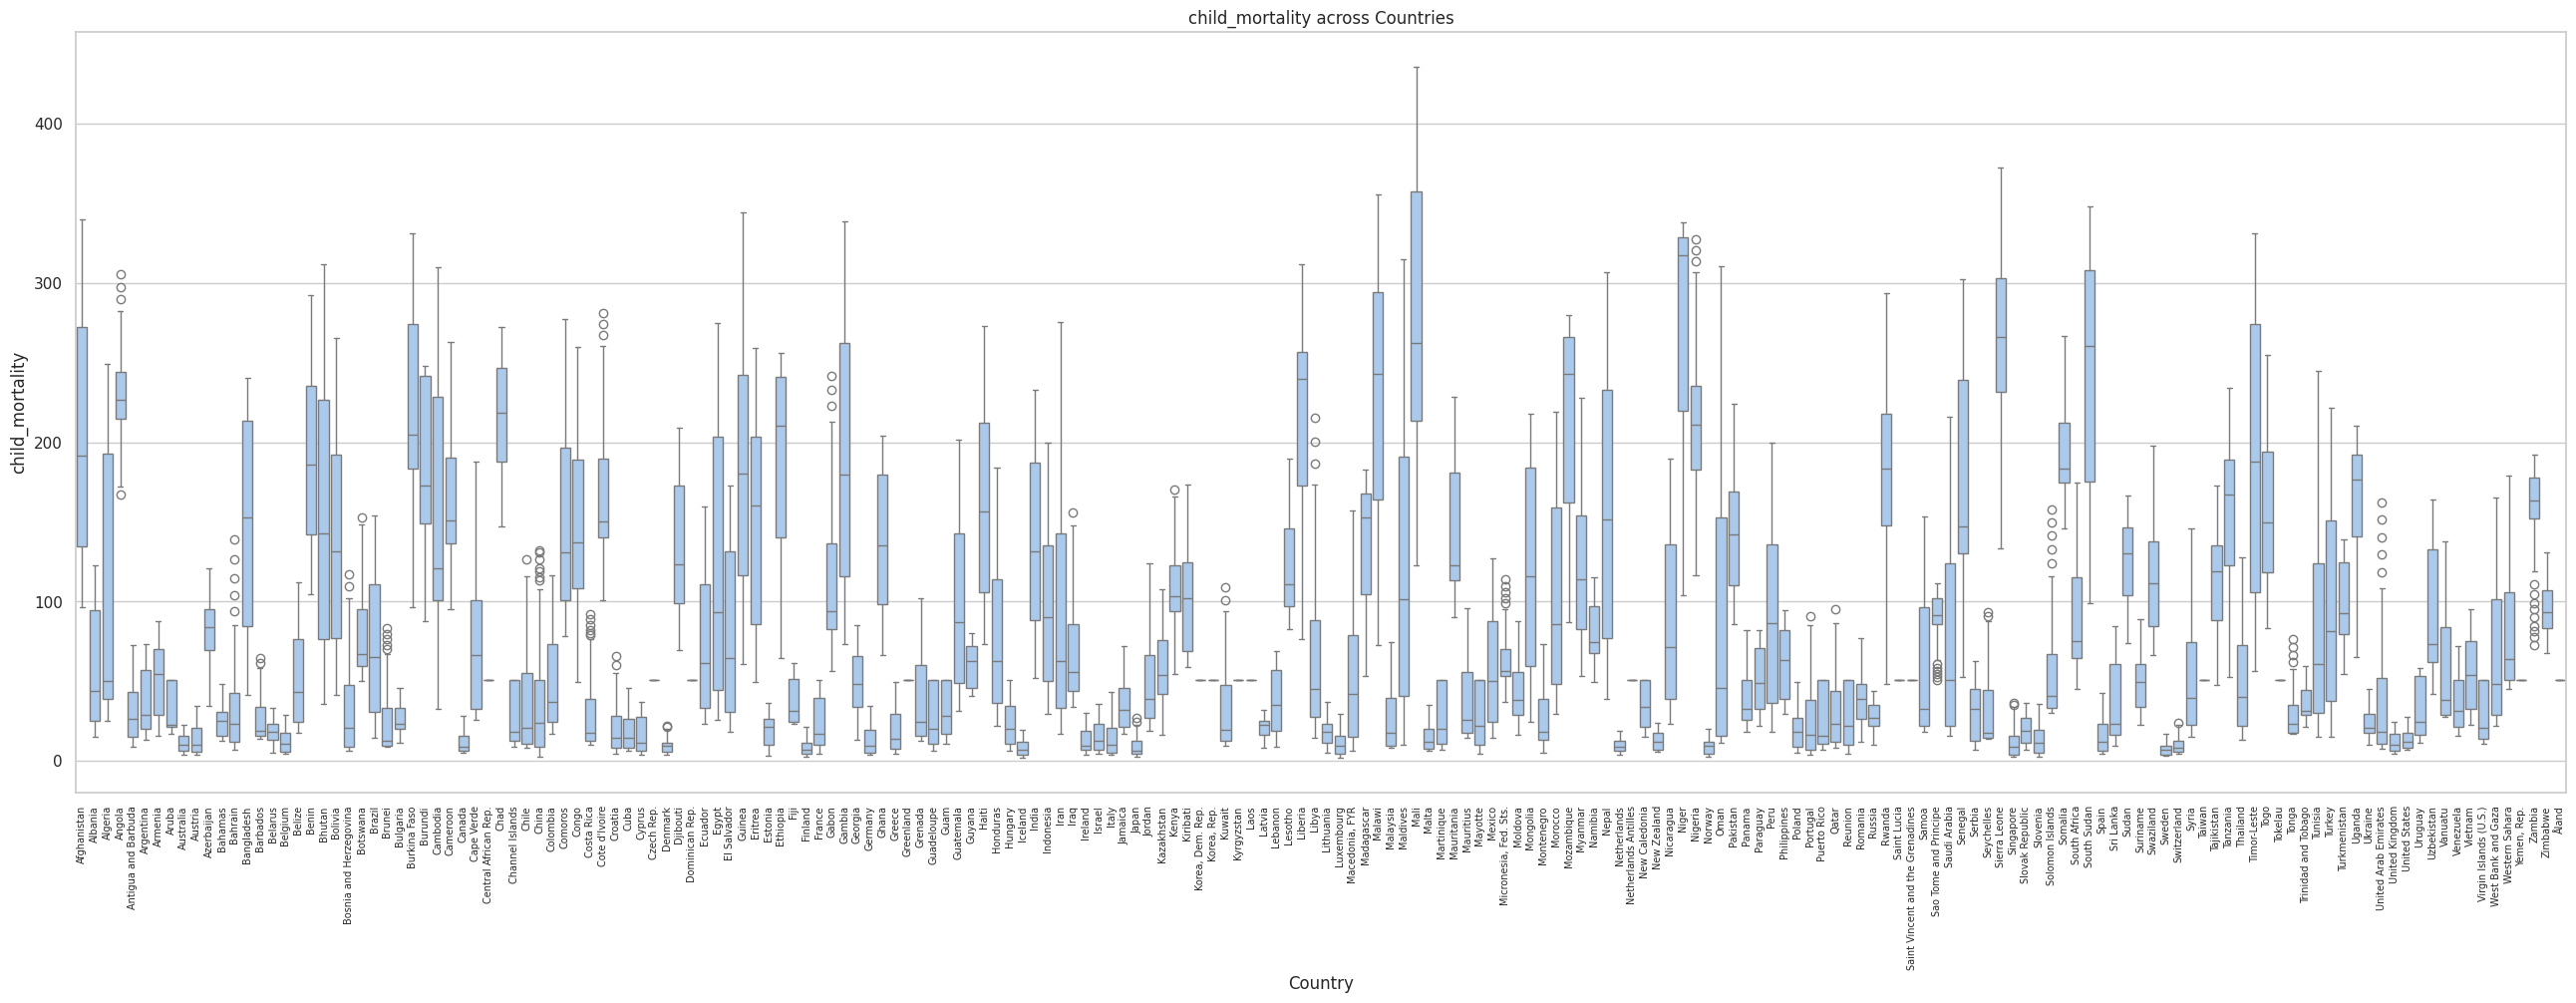

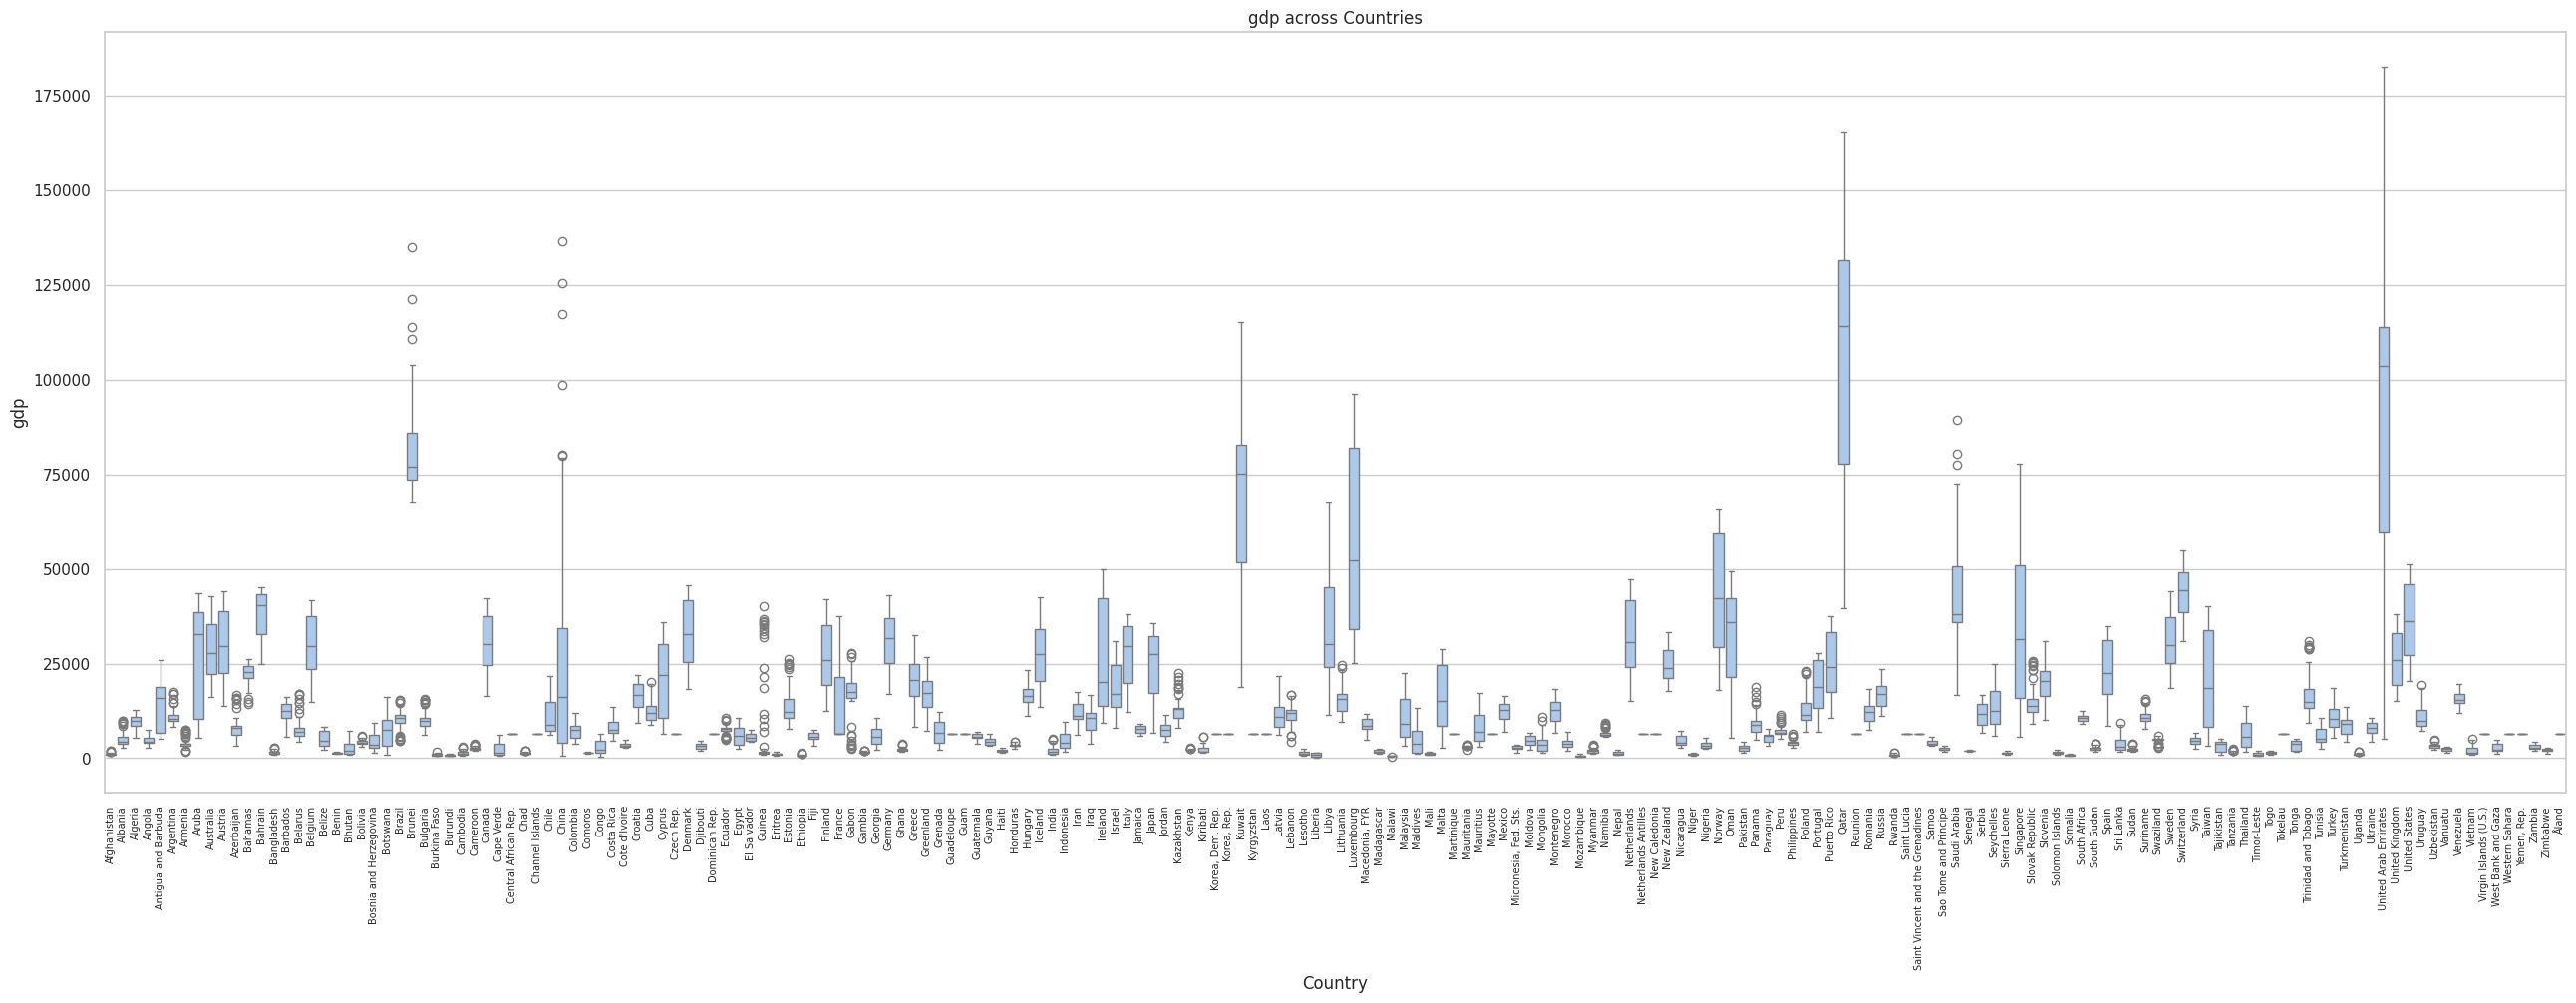

In [273]:
#lets check country vs others

num_cols = ['fertility', 'life', 'population', 'child_mortality', 'gdp']
df_pd = df.select(['Country'] + num_cols).toPandas()

for col in num_cols:
    plt.figure(figsize=(26, 10))
    sns.boxplot(data=df_pd, x='Country', y=col)
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()
    plt.title(f'{col} across Countries')

    plt.show()

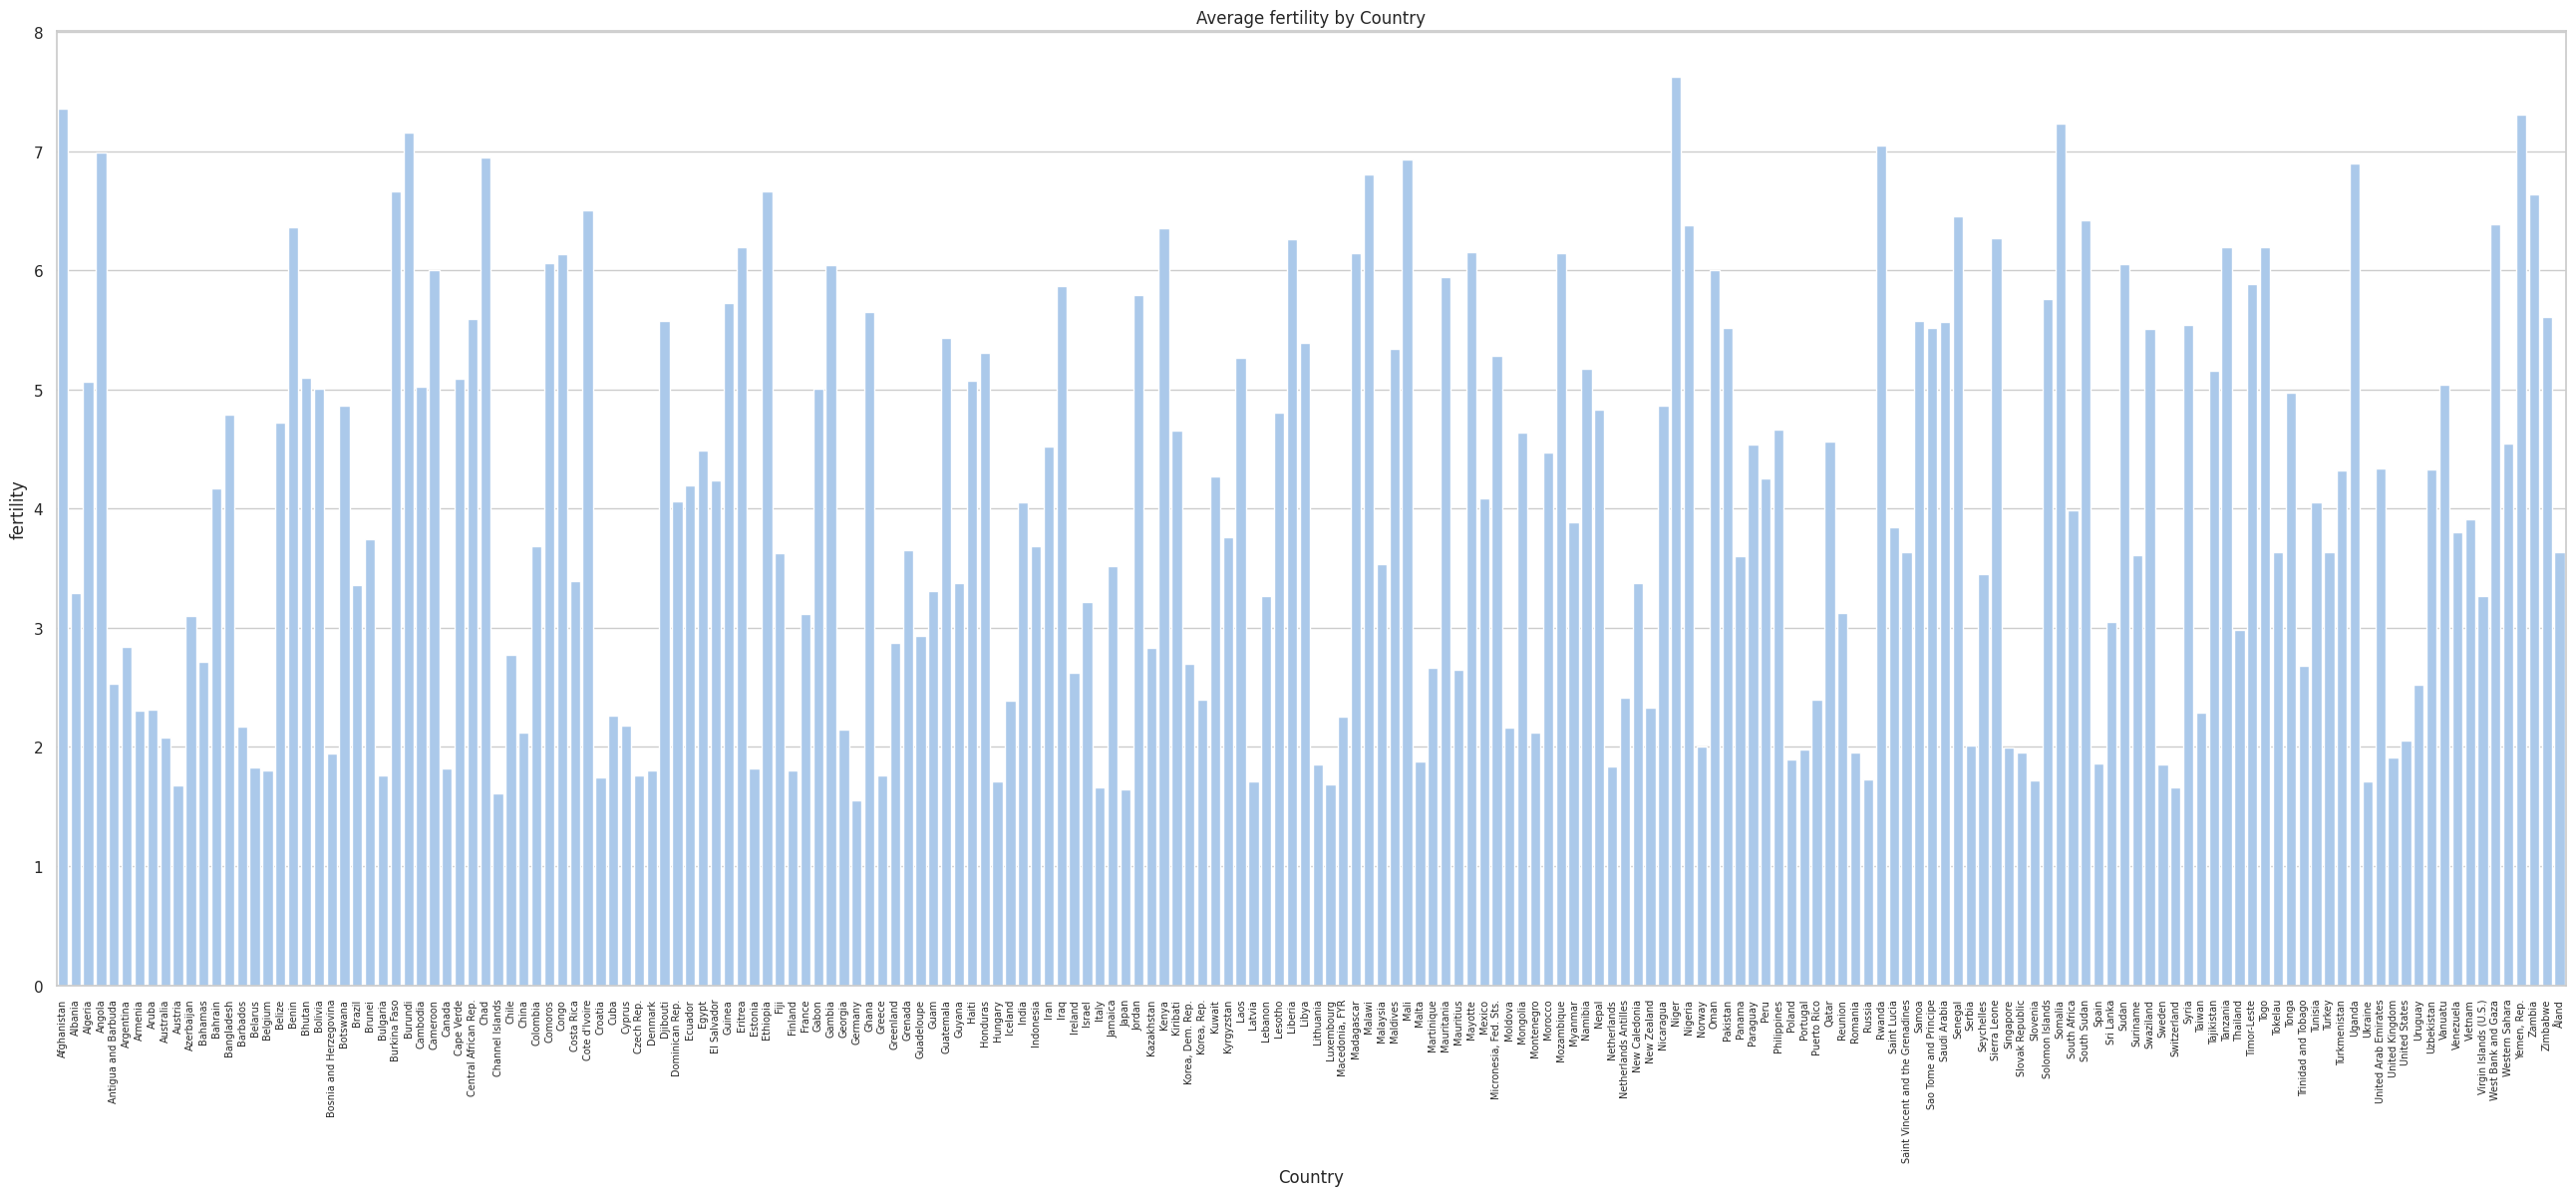

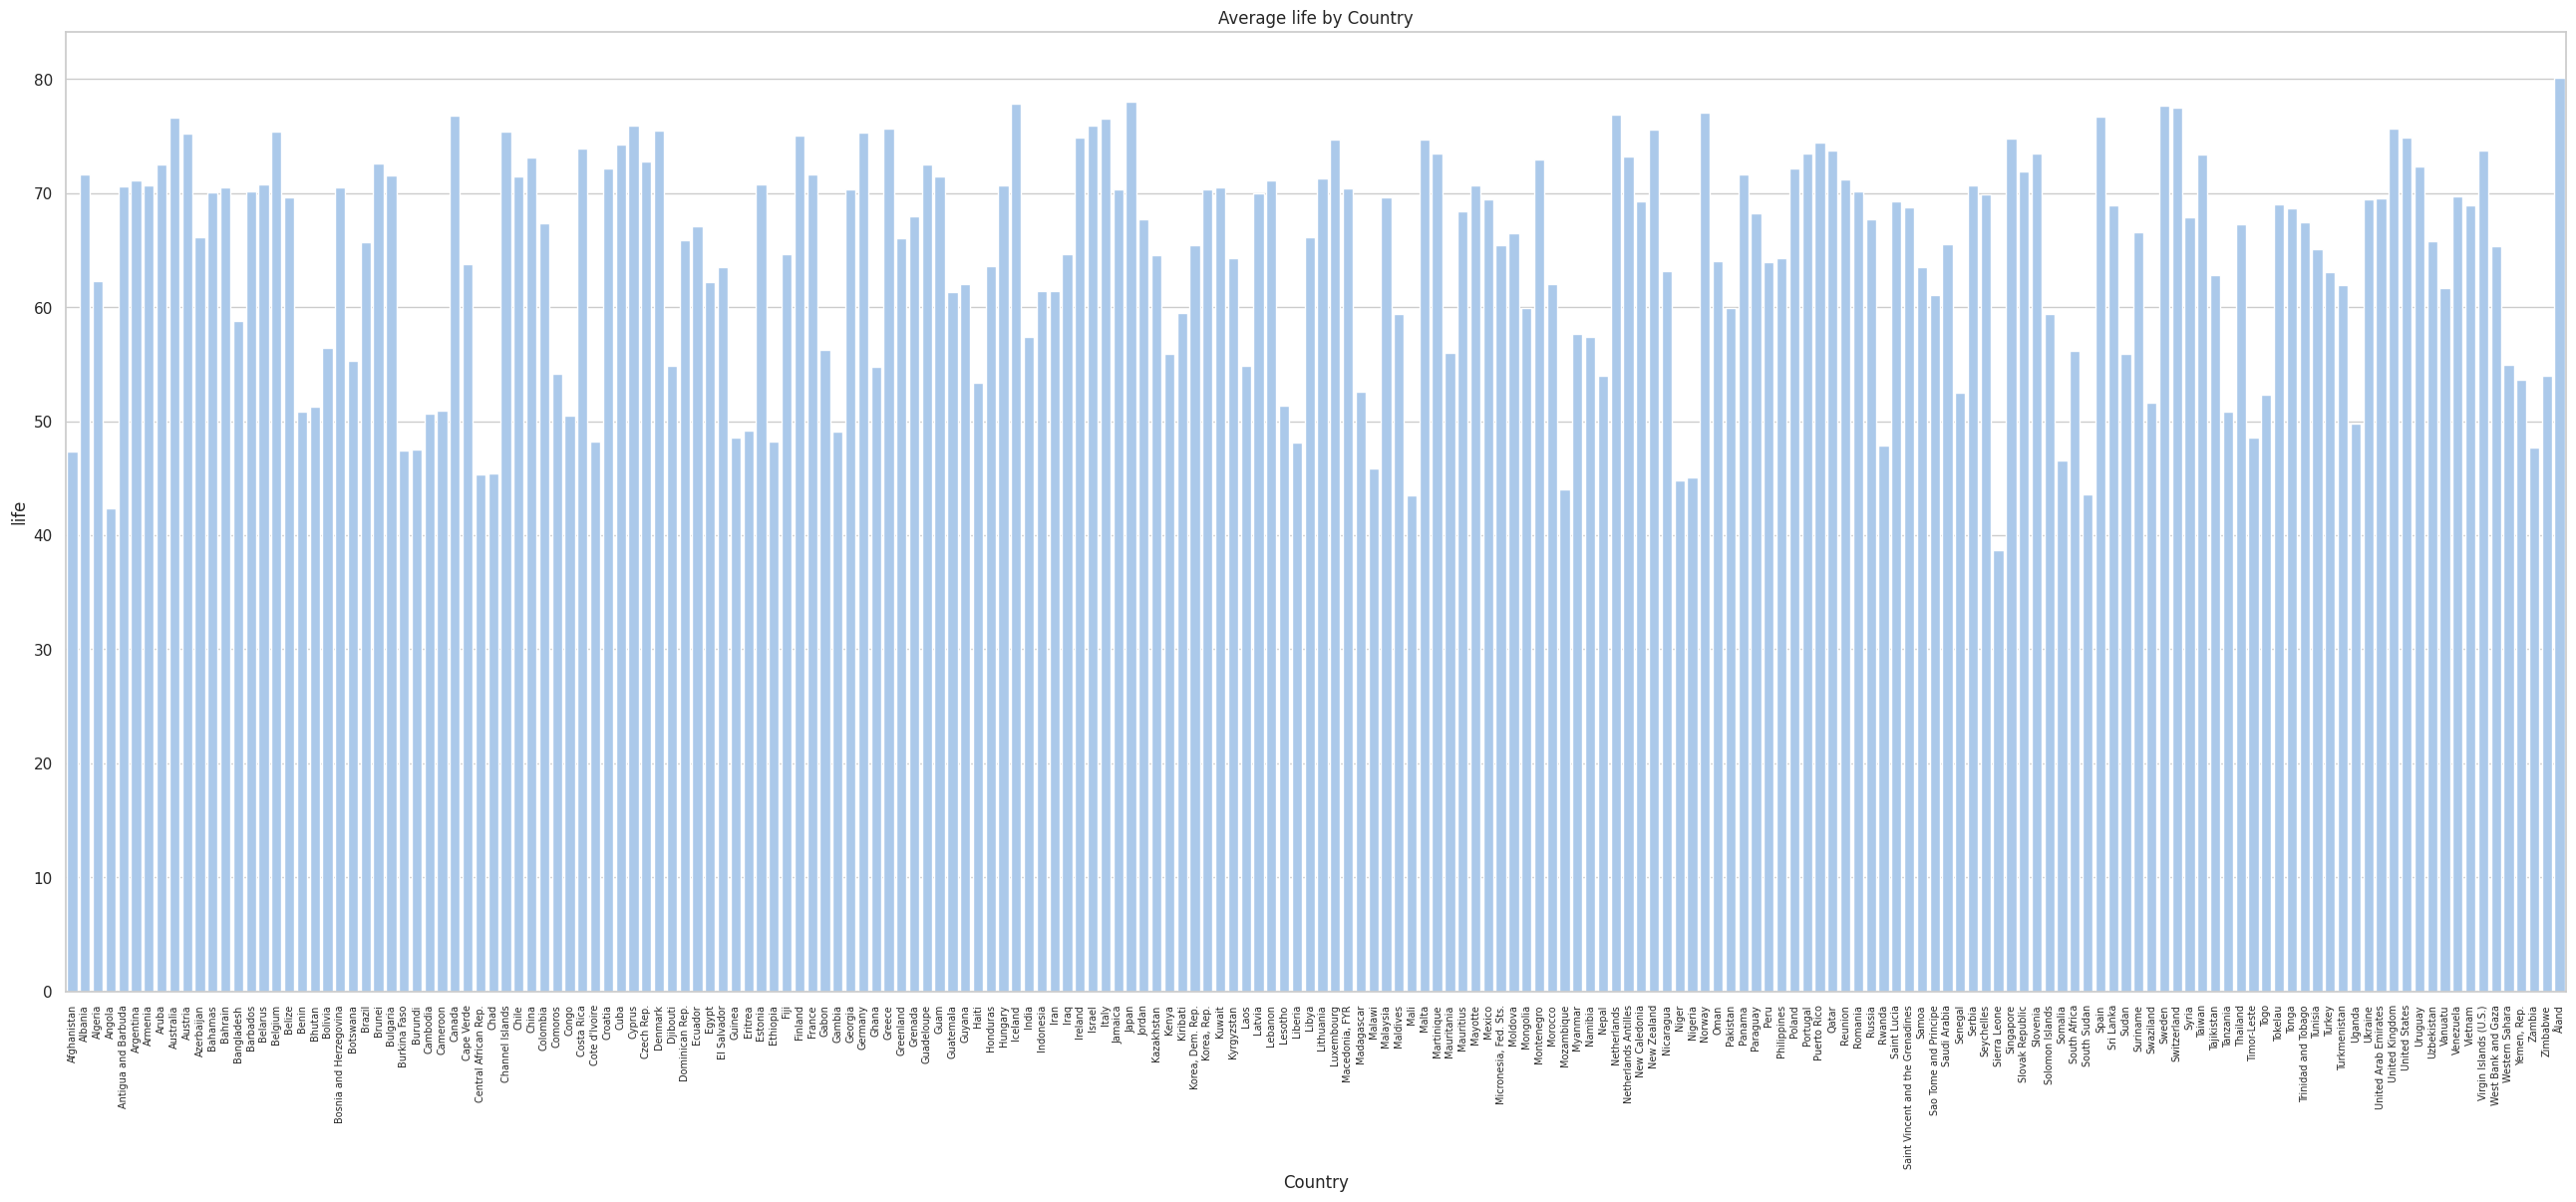

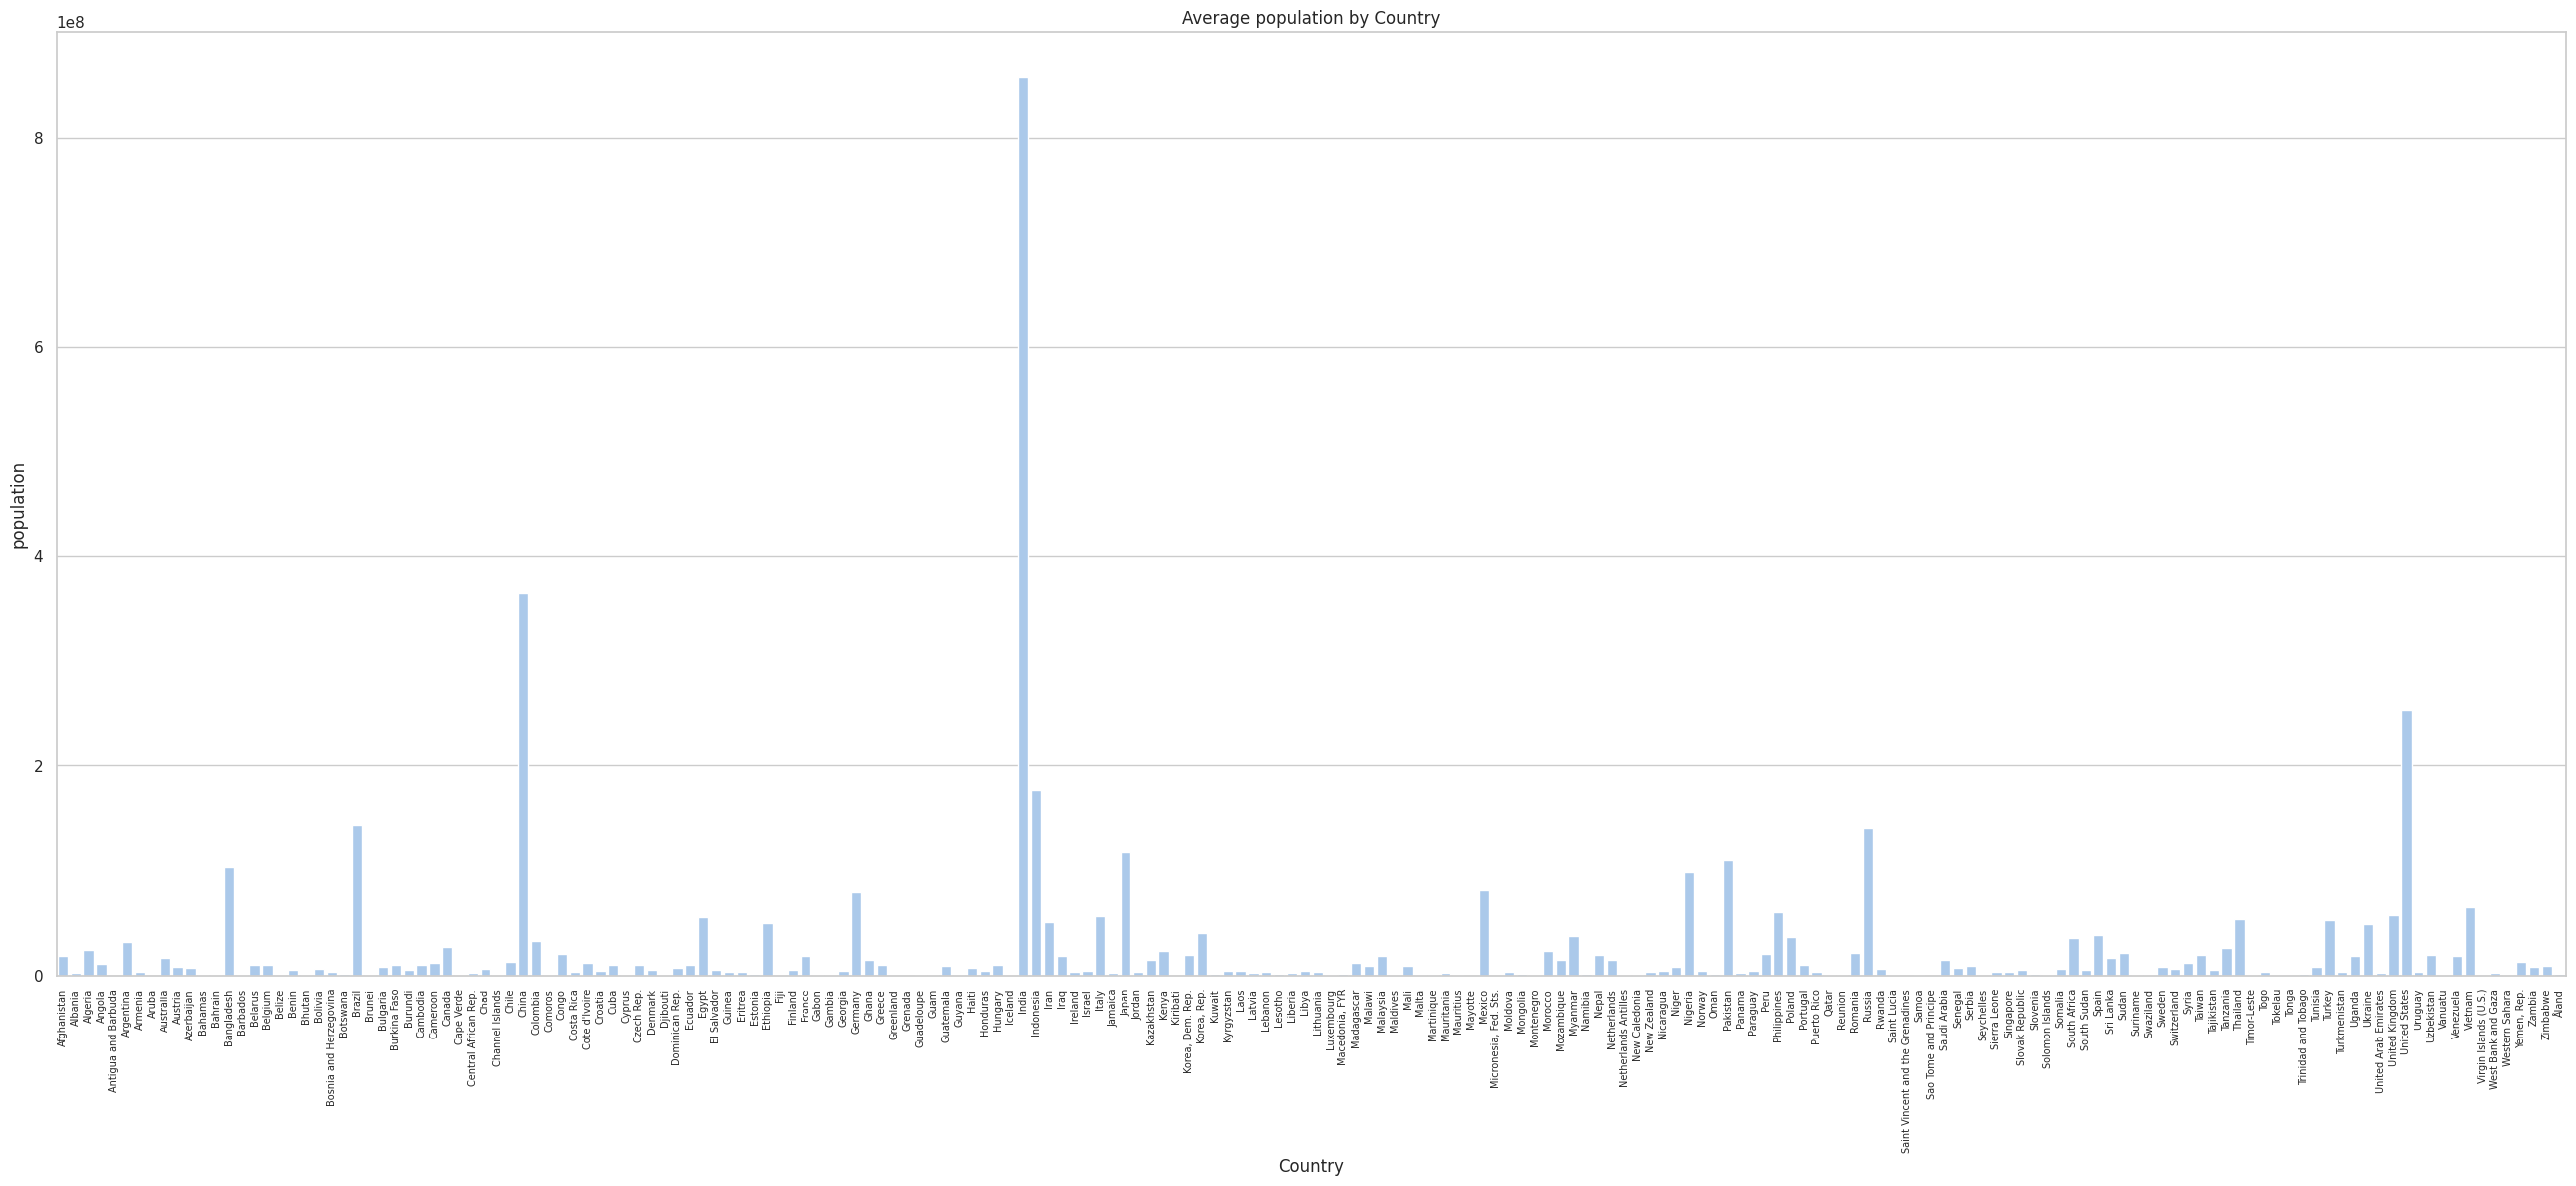

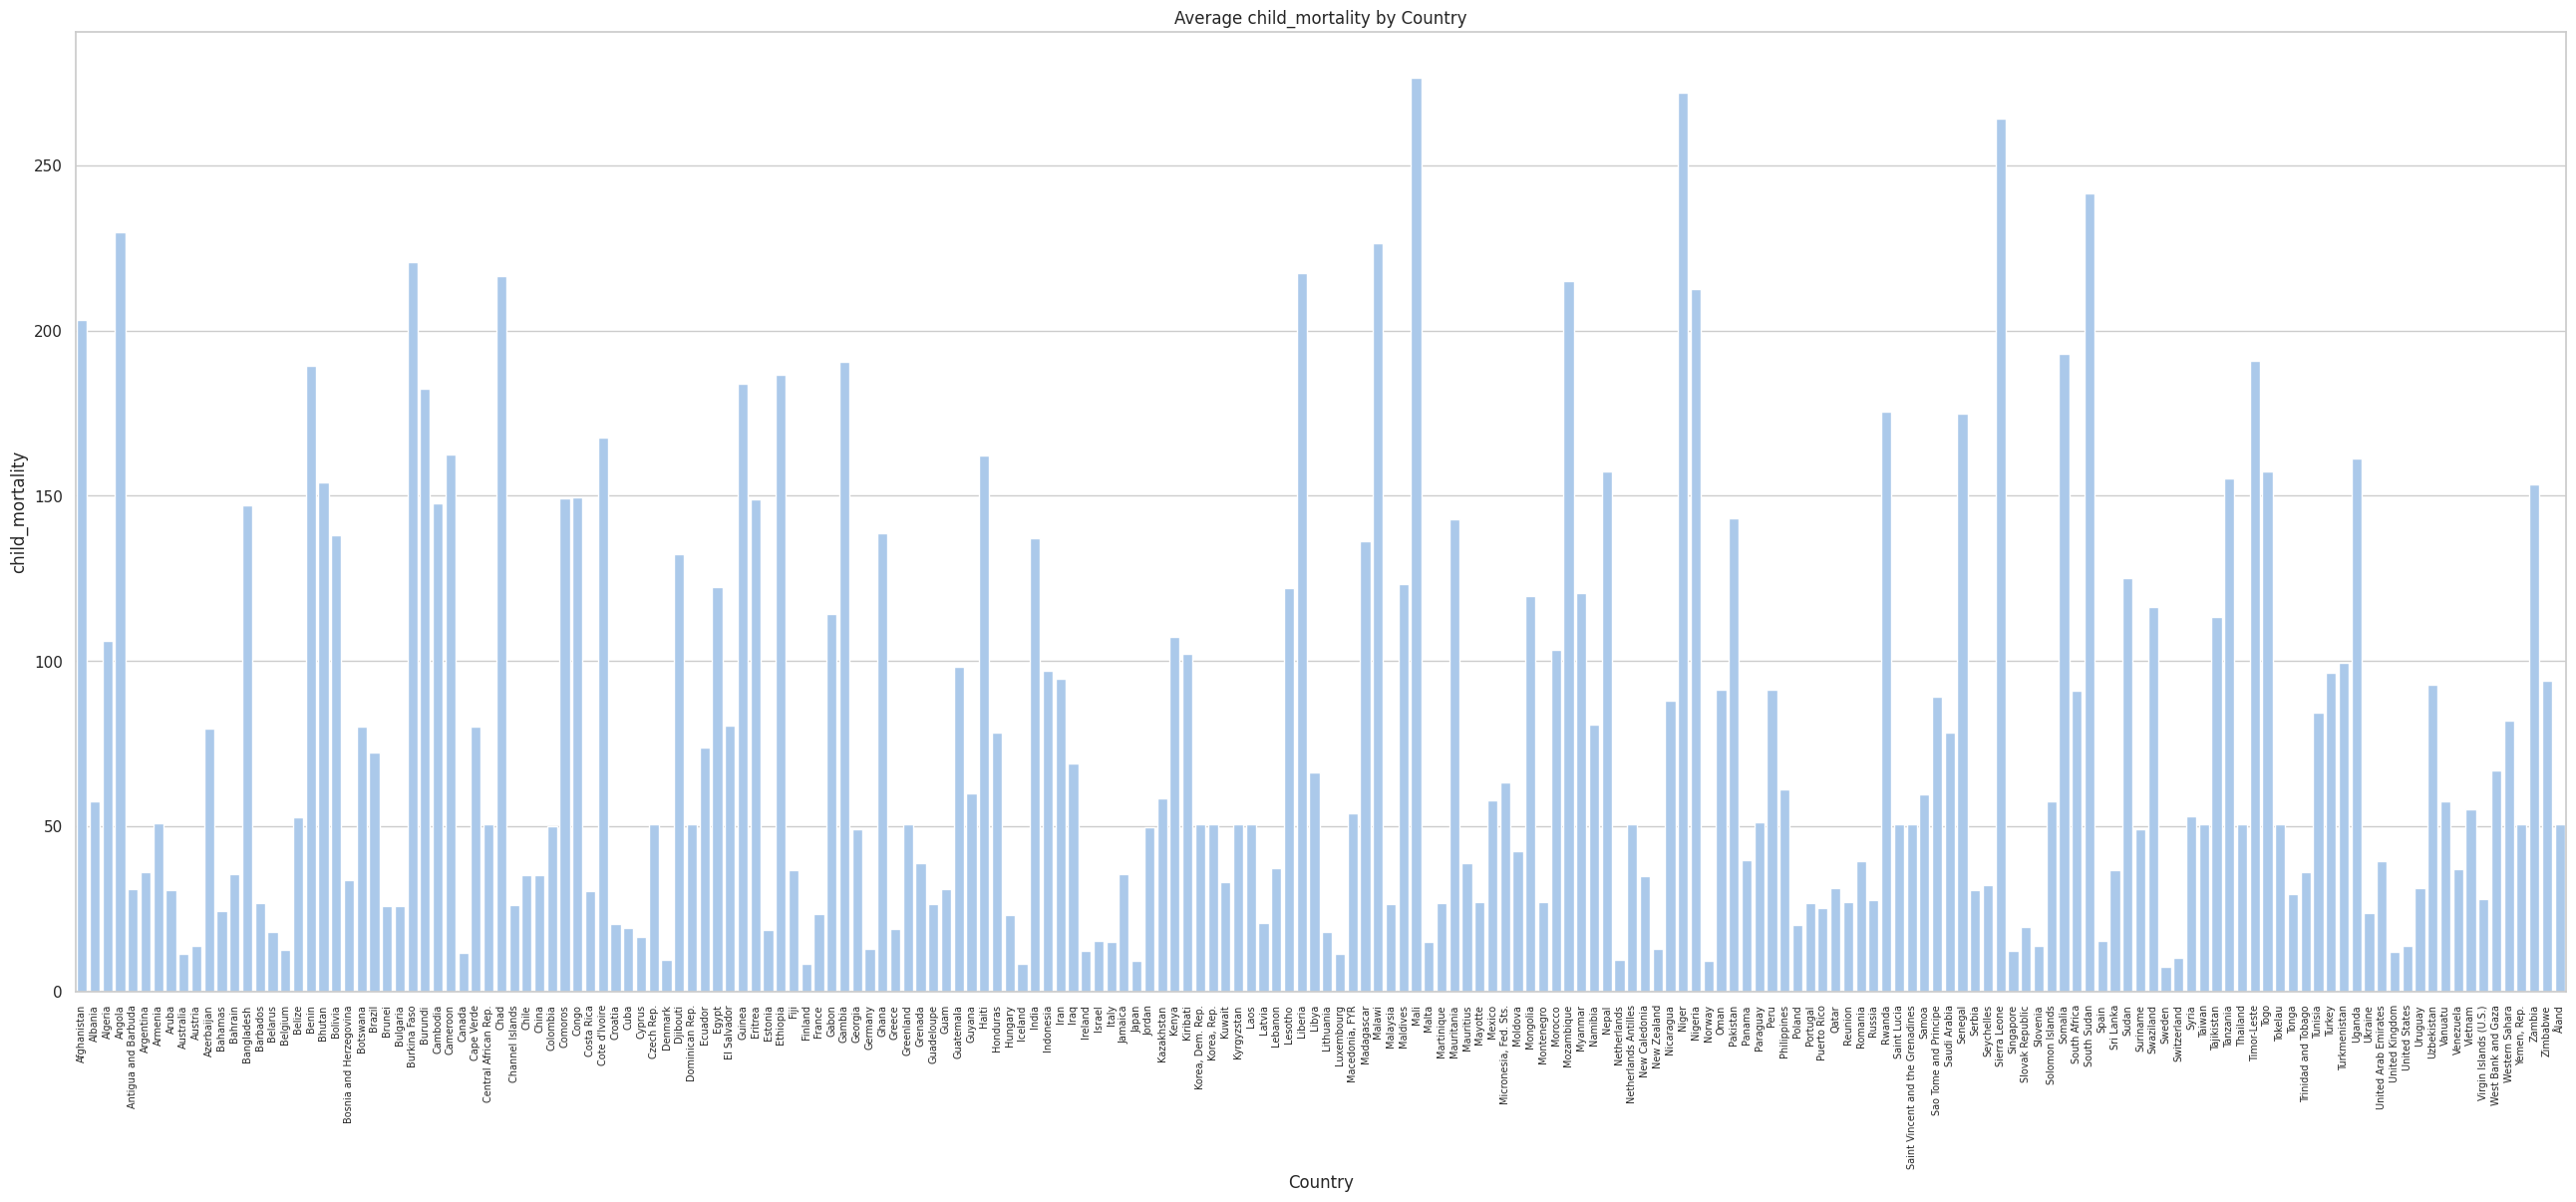

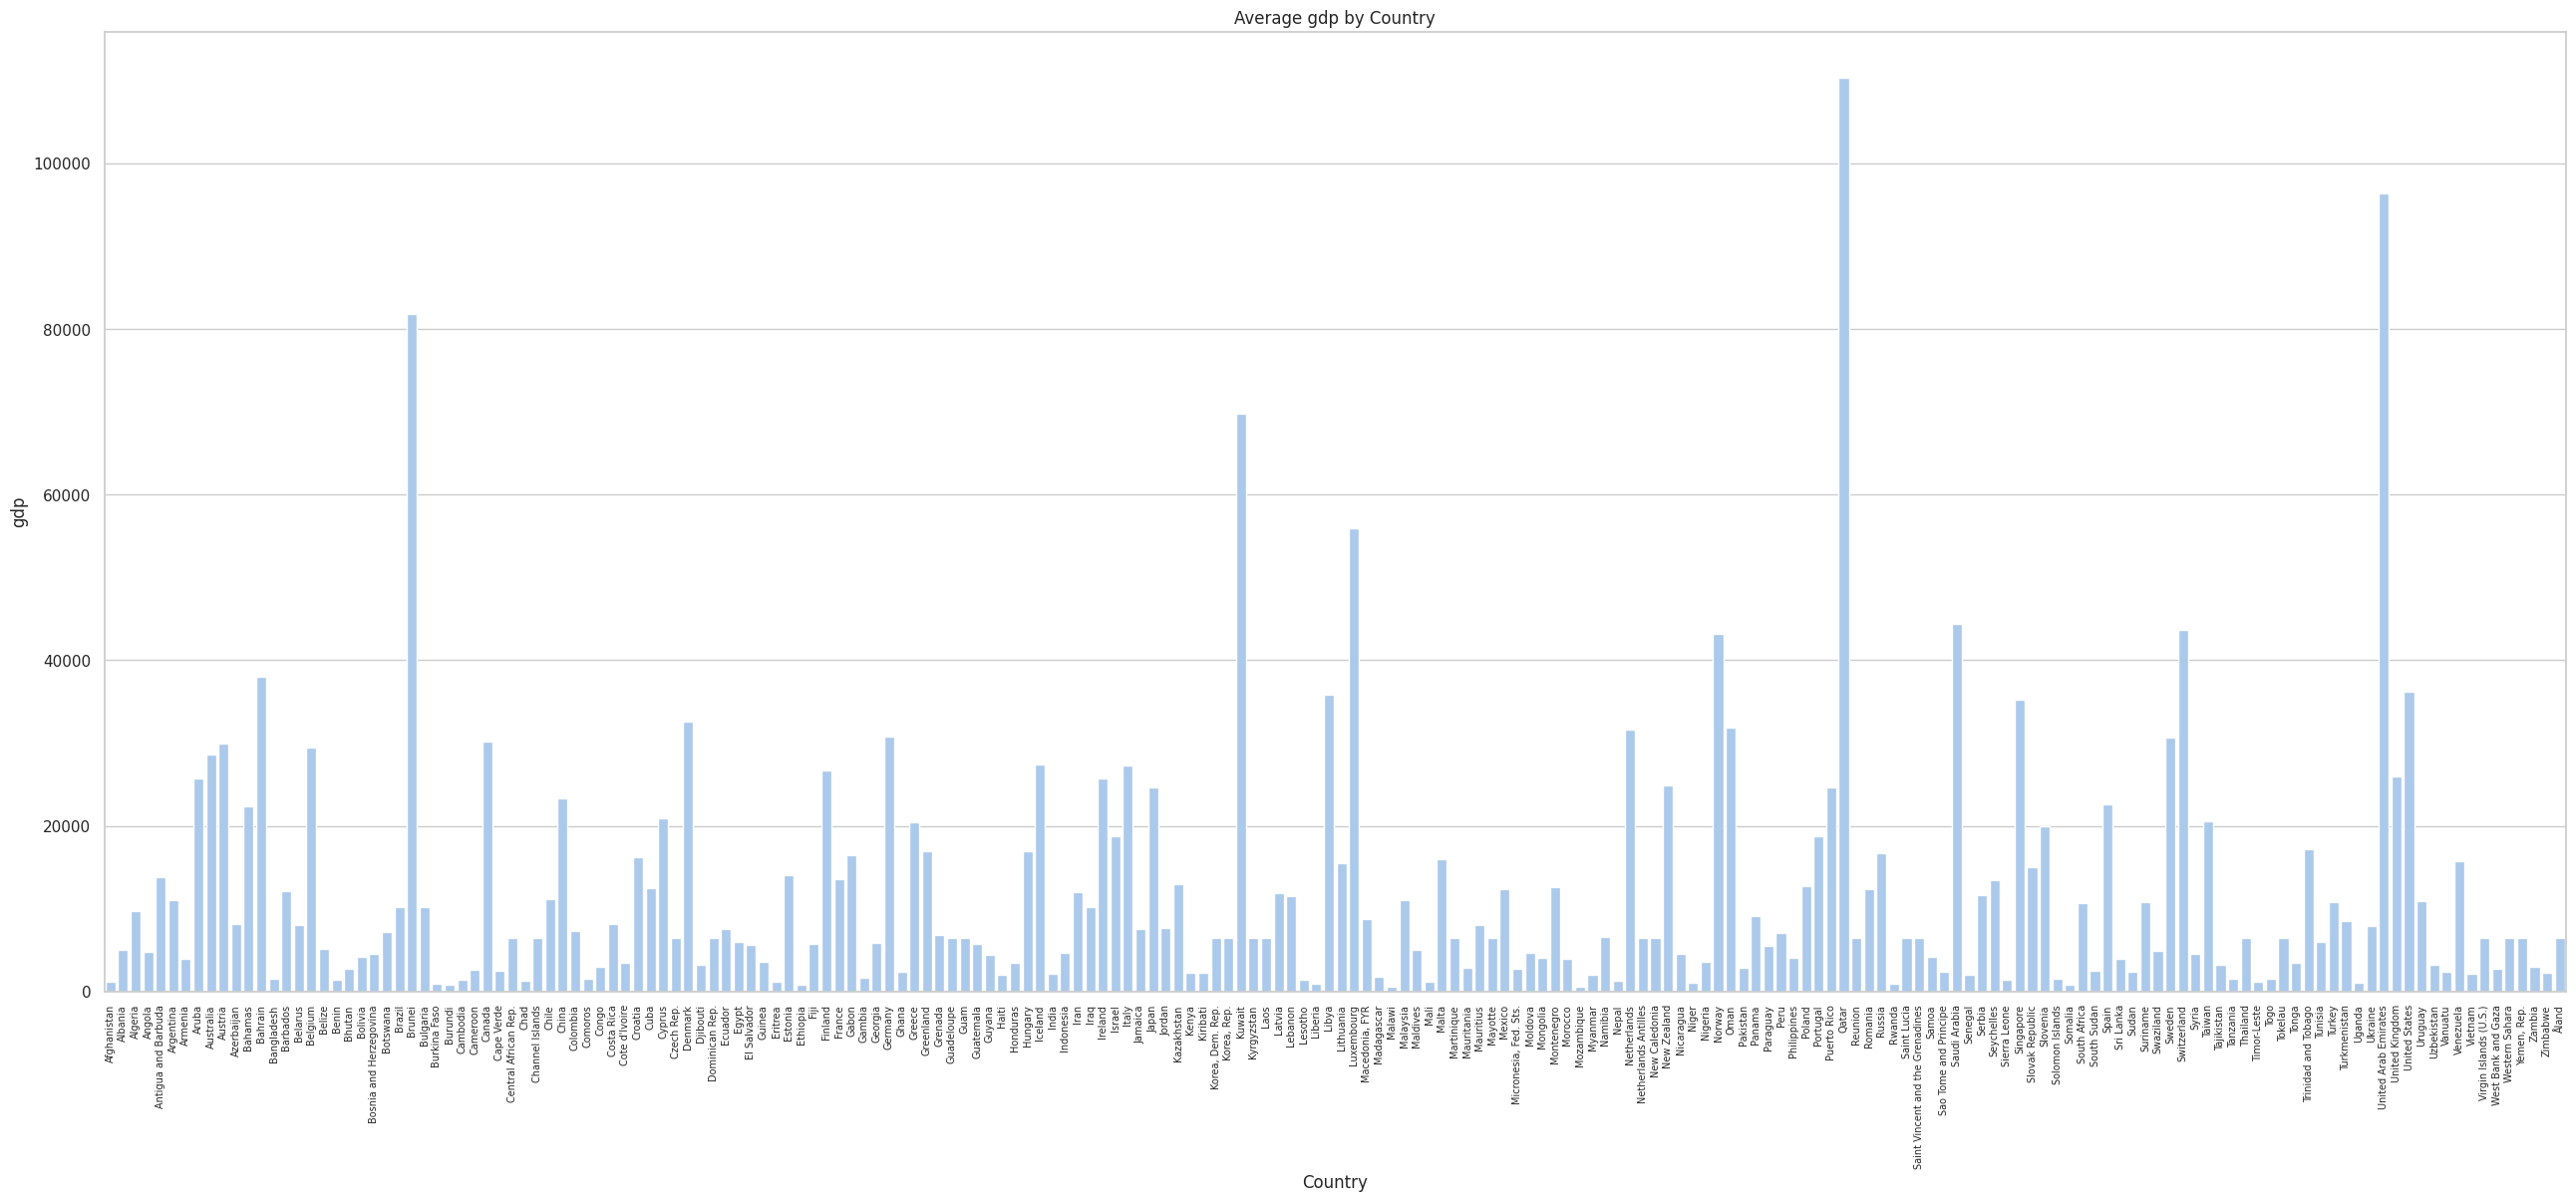

In [274]:
for col in num_cols:
    plt.figure(figsize=(26, 12))
    sns.barplot(data=df_pd, x='Country', y=col, estimator='mean' , errorbar=None)
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()
    plt.title(f'Average {col} by Country')

    plt.show()

In [275]:
#lets check top 10 most fertile countries on average
from pyspark.sql.functions import mean, desc

df.groupBy('Country') \
  .agg(mean('fertility').alias('avg_fertility')) \
  .orderBy(desc('avg_fertility')) \
  .show(10)

+-----------+------------------+
|    Country|     avg_fertility|
+-----------+------------------+
|      Niger| 7.624020000000002|
|Afghanistan| 7.359780000000001|
|Yemen, Rep.|           7.30394|
|    Somalia| 7.229999999999999|
|    Burundi|           7.15894|
|     Rwanda| 7.045179999999998|
|     Angola| 6.988800000000001|
|       Chad|6.9455399999999985|
|       Mali|6.9314399999999985|
|     Uganda| 6.896080000000001|
+-----------+------------------+
only showing top 10 rows



In [276]:
#lets check bottom 10 most fertile countries on average
from pyspark.sql.functions import asc

df.groupby('Country') \
  .agg(mean('fertility').alias('avg_fertility')) \
  .orderBy(asc('avg_fertility')) \
  .show(10)

+---------------+------------------+
|        Country|     avg_fertility|
+---------------+------------------+
|        Germany|1.5552600000000003|
|Channel Islands|1.6118400000000006|
|          Japan|1.6451199999999995|
|    Switzerland|1.6587199999999995|
|          Italy|1.6593400000000003|
|        Austria|1.6807000000000003|
|     Luxembourg| 1.687340000000001|
|         Latvia|            1.7086|
|        Hungary|1.7115400000000005|
|        Ukraine|1.7146799999999995|
+---------------+------------------+
only showing top 10 rows



In [277]:
#lets check top 10 countries in life expentancy

df.groupby('Country') \
  .agg(mean('life').alias('avg_life_expentancy')) \
  .orderBy(desc('avg_life_expentancy')) \
  .show(10)


+-----------+-------------------+
|    Country|avg_life_expentancy|
+-----------+-------------------+
|      Åland|             80.139|
|      Japan|  78.04133999999999|
|    Iceland|  77.83047999999997|
|     Sweden|           77.63938|
|Switzerland|  77.51625999999999|
|     Norway|  77.05122000000003|
|Netherlands|           76.86856|
|     Canada|  76.80774000000001|
|      Spain|  76.74064000000003|
|  Australia|  76.60392000000002|
+-----------+-------------------+
only showing top 10 rows



In [278]:
#lets check bottom 10 countries in life expentancy

df.groupby('Country') \
  .agg(mean('life').alias('avg_life_expentancy')) \
  .orderBy(asc('avg_life_expentancy')) \
  .show(10)


+--------------------+-------------------+
|             Country|avg_life_expentancy|
+--------------------+-------------------+
|        Sierra Leone| 38.680499999999995|
|              Angola|  42.32715999999999|
|                Mali|  43.47211999999999|
|         South Sudan|  43.55338000000002|
|          Mozambique| 44.066460000000006|
|               Niger|  44.80898000000003|
|             Nigeria| 45.033019999999986|
|Central African Rep.|           45.34536|
|                Chad|             45.417|
|              Malawi| 45.858620000000016|
+--------------------+-------------------+
only showing top 10 rows



In [279]:
#lets check which region has the most population

df.groupby('region') \
  .agg(sum("population").alias('total_population')) \
  .orderBy(desc('total_population')) \
  .show(10)

+--------------------+----------------+
|              region|total_population|
+--------------------+----------------+
| East Asia & Pacific| 8.7552592579E10|
|          South Asia| 5.6271266979E10|
|Europe & Central ...| 4.0935442285E10|
|             America| 3.5491439442E10|
|  Sub-Saharan Africa|  2.627496164E10|
|Middle East & Nor...| 1.2298681448E10|
+--------------------+----------------+



In [280]:
#lets check which region has the least population

df.groupby('region') \
  .agg(sum('population').alias('total_population')) \
  .orderBy(asc('total_population')) \
  .show(10)

+--------------------+----------------+
|              region|total_population|
+--------------------+----------------+
|Middle East & Nor...| 1.2298681448E10|
|  Sub-Saharan Africa|  2.627496164E10|
|             America| 3.5491439442E10|
|Europe & Central ...| 4.0935442285E10|
|          South Asia| 5.6271266979E10|
| East Asia & Pacific| 8.7552592579E10|
+--------------------+----------------+



In [281]:
#lets check which region has the highest average gdp
df.groupby('region') \
  .agg(mean('gdp').alias('average_gdp')) \
  .orderBy(desc('average_gdp')) \
  .show(10)

+--------------------+-----------------+
|              region|      average_gdp|
+--------------------+-----------------+
|Middle East & Nor...|25503.85238095238|
|Europe & Central ...|  17691.823828125|
| East Asia & Pacific|12039.34572142411|
|             America|       10567.6375|
|  Sub-Saharan Africa|        3349.5928|
|          South Asia|          2552.65|
+--------------------+-----------------+



In [282]:
#lets check which region has the highest average gdp
df.groupby('region') \
  .agg(mean('gdp').alias('average_gdp')) \
  .orderBy(asc('average_gdp')) \
  .show(10)

+--------------------+-----------------+
|              region|      average_gdp|
+--------------------+-----------------+
|          South Asia|          2552.65|
|  Sub-Saharan Africa|        3349.5928|
|             America|       10567.6375|
| East Asia & Pacific|12039.34572142411|
|Europe & Central ...|  17691.823828125|
|Middle East & Nor...|25503.85238095238|
+--------------------+-----------------+





---



## **Steps to Use Window Functions in PySpark**



**1. Define the Window Specification**

   Create a WindowSpec using the Window class.
    
   Specify:

   - partitionBy to group data (optional)

   - orderBy to sort within each partition (often required)

   - Optionally, define the frame with rowsBetween or rangeBetween for moving calculations

**2. Apply a Window Function**

   - Use a window function (like rank(), sum(), lag(), row_number(), etc.) and bind it to your window spec with .over(windowSpec).

**3. Add the Result to Your DataFrame**
    
   - Use .withColumn() (or .select()) to add the result as a new column.

**4. View the Results**
    
   - Call .show() on your DataFrame to see the output

   - define windowSpec -> use over(windowSpec) with window function -> use withcolumn/select to view



---



In [357]:
# within each region find top 2 countries with highest child_mortality rate on average

from pyspark.sql.window import Window
from pyspark.sql.functions import *


df_avg = df.groupBy("region", "country").agg(avg("child_mortality").alias("avg_mortality"))
windowSpec = Window.partitionBy("region").orderBy(desc('avg_mortality'))
region_top2_countries_mortality = df_avg.withColumn('top_2_mortality', rank().over(windowSpec))
region_top2_countries_mortality.filter("top_2_mortality <=2").show(20)





+--------------------+------------+------------------+---------------+
|              region|     country|     avg_mortality|top_2_mortality|
+--------------------+------------+------------------+---------------+
|             America|       Haiti|162.15800000000002|              1|
|             America|     Bolivia|138.12199999999996|              2|
| East Asia & Pacific| Timor-Leste|190.74140000000003|              1|
| East Asia & Pacific|    Cambodia|147.62340000000003|              2|
|Europe & Central ...|  Tajikistan|113.46400000000001|              1|
|Europe & Central ...|Turkmenistan| 99.36899999999996|              2|
|Middle East & Nor...|    Djibouti|132.33919999999998|              1|
|Middle East & Nor...|       Egypt|122.31199999999998|              2|
|          South Asia| Afghanistan|203.19799999999998|              1|
|          South Asia|       Nepal|           157.346|              2|
|  Sub-Saharan Africa|        Mali|           276.596|              1|
|  Sub

In [359]:
# within each region find top 2 countries with least child_mortality rate

windowSpec = Window.partitionBy('region').orderBy(asc('avg_mortality'))
region_top2_countries_mortality = df_avg.withColumn('top_2_mortality', rank().over(windowSpec))
region_top2_countries_mortality.filter("top_2_mortality <=2").show(20)



+--------------------+-------------+------------------+---------------+
|              region|      country|     avg_mortality|top_2_mortality|
+--------------------+-------------+------------------+---------------+
|             America|       Canada|11.674000000000003|              1|
|             America|United States|13.711999999999998|              2|
| East Asia & Pacific|        Japan|             9.144|              1|
| East Asia & Pacific|    Australia|11.452000000000004|              2|
|Europe & Central ...|       Sweden| 7.570000000000002|              1|
|Europe & Central ...|      Iceland|             8.274|              2|
|Middle East & Nor...|       Israel|15.397800000000004|              1|
|Middle East & Nor...|        Qatar|31.242600000000007|              2|
|          South Asia|    Sri Lanka|            36.666|              1|
|          South Asia|     Maldives|123.19800000000001|              2|
|  Sub-Saharan Africa|      Mayotte|26.946000000000016|         

In [361]:
# For each country, calculate the 3-year moving average of life expectancy

windowSpec = Window.partitionBy('Country').orderBy('Year').rowsBetween(-2,0)
moving_avg = df.withColumn('3_year_moving_avg' , avg('life').over(windowSpec))
moving_avg.show()



+-----------+----+-----------------+------------------+-----------+---------------+------+----------+------------------+
|    Country|Year|        fertility|              life| population|child_mortality|   gdp|    region| 3_year_moving_avg|
+-----------+----+-----------------+------------------+-----------+---------------+------+----------+------------------+
|Afghanistan|1964|            7.671|            33.639|1.0474903E7|          339.7|1182.0|South Asia|            33.639|
|Afghanistan|1965|            7.671|            34.152|1.0697983E7|          334.1|1182.0|South Asia|           33.8955|
|Afghanistan|1966|            7.671|            34.662|1.0927724E7|          328.7|1168.0|South Asia|            34.151|
|Afghanistan|1967|            7.671|             35.17|1.1163656E7|          323.3|1173.0|South Asia| 34.66133333333333|
|Afghanistan|1968|            7.671|            35.674|1.1411022E7|          318.1|1187.0|South Asia| 35.16866666666667|
|Afghanistan|1969|            7.

In [368]:
# For each country, compute the year-over-year difference in GDP.

windowSpec = Window.partitionBy('Country').orderBy('Year')
yoy_gdp =  df.withColumn('prev_year_gdp' , lag('gdp').over(windowSpec))
yoy_gdp_final =  yoy_gdp.withColumn('yoy_growth' , col('gdp') - col('prev_year_gdp'))
yoy_gdp_final.show()


+-----------+----+-----------------+------------------+-----------+---------------+------+----------+-------------+----------+
|    Country|Year|        fertility|              life| population|child_mortality|   gdp|    region|prev_year_gdp|yoy_growth|
+-----------+----+-----------------+------------------+-----------+---------------+------+----------+-------------+----------+
|Afghanistan|1964|            7.671|            33.639|1.0474903E7|          339.7|1182.0|South Asia|         NULL|      NULL|
|Afghanistan|1965|            7.671|            34.152|1.0697983E7|          334.1|1182.0|South Asia|       1182.0|       0.0|
|Afghanistan|1966|            7.671|            34.662|1.0927724E7|          328.7|1168.0|South Asia|       1182.0|     -14.0|
|Afghanistan|1967|            7.671|             35.17|1.1163656E7|          323.3|1173.0|South Asia|       1168.0|       5.0|
|Afghanistan|1968|            7.671|            35.674|1.1411022E7|          318.1|1187.0|South Asia|       117

In [378]:
# Identify Year with Highest Population for Each Country

df_avg  = df.groupby('Country' , 'Year').agg(sum('population').alias("sum_population"))
windowSpec = Window.partitionBy('Country').orderBy(desc('sum_population'))
ranking_df = df_avg.withColumn( 'ranks' , rank().over(windowSpec) )
ranking_df.filter('ranks=1').show()

+-------------------+----+--------------+-----+
|            Country|Year|sum_population|ranks|
+-------------------+----+--------------+-----+
|        Afghanistan|2013|   3.4499915E7|    1|
|            Albania|1991|     3291695.0|    1|
|            Algeria|2013|   3.6983924E7|    1|
|             Angola|2013|   2.0714494E7|    1|
|Antigua and Barbuda|2013|       91404.0|    1|
|          Argentina|2013|   4.1473982E7|    1|
|            Armenia|1990|     3544695.0|    1|
|              Aruba|2013|      108883.0|    1|
|          Australia|2013|   2.3213944E7|    1|
|            Austria|2013|     8441263.0|    1|
|         Azerbaijan|2013|     9533445.0|    1|
|            Bahamas|2013|      355233.0|    1|
|            Bahrain|2013|     1377273.0|    1|
|         Bangladesh|2013|  1.54393847E8|    1|
|           Barbados|2013|      275141.0|    1|
|            Belarus|1993|   1.0301336E7|    1|
|            Belgium|2013|   1.0815599E7|    1|
|             Belize|2013|      330721.0

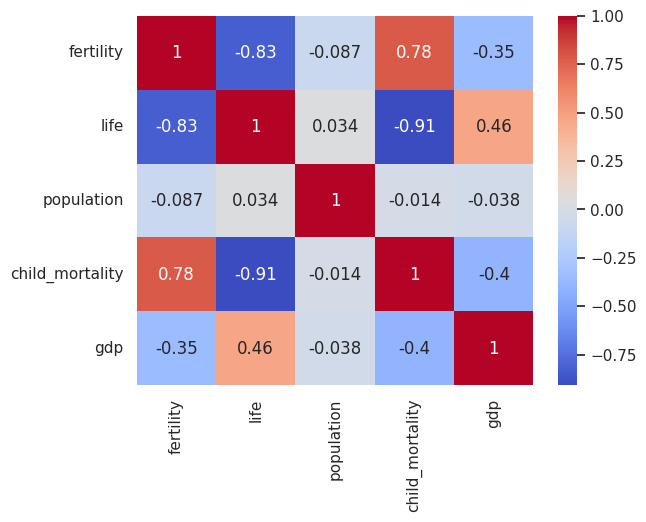

In [336]:
#lets plot a heat-map between numerical vairable

sns.heatmap(df_pd.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()



---

---

## Key Findings

# 🌍 Global Demographic & Economic Insights (Based on Dataset Analysis)

---

## 👶 Fertility Rate

- **Highest Fertility:**
  - **Niger** has the highest average fertility rate across all years — **7.6 children per woman**.
    - 📌 *Possible Reason:* Limited access to family planning, cultural norms favoring large families, and low female education levels.

- **Lowest Fertility:**
  - **Germany** shows the lowest average fertility — **1.5 children per woman**.
    - 📌 *Possible Reason:* Urbanization, higher female workforce participation, and widespread access to contraceptives.

---

## 🧓 Life Expectancy

- **Highest Life Expectancy:**
  - **Åland Islands** leads with an average life expectancy of **80 years**, closely followed by **Japan**.
    - 📌 *Possible Reason:* High-quality healthcare, low crime rate, and excellent diet & lifestyle in developed regions.

- **Lowest Life Expectancy:**
  - **Sierra Leone** has the lowest at **38 years**, followed by **Angola**.
    - 📌 *Possible Reason:* Civil conflicts, poor healthcare infrastructure, and high child mortality rates.

---

## 👥 Population Distribution by Region

- **Most Populated Region:**
  - **East Asia & Pacific** ranks **1st**.
    - 📌 *Possible Reason:* Countries like **China** and **Indonesia** contribute massive population numbers.

- **Least Populated Region:**
  - **Middle East & North Africa** ranks **last**.
    - 📌 *Possible Reason:* Fewer countries, smaller land areas, and lower population densities.

---

## 💰 Average GDP by Region

- **Highest GDP:**
  - **Middle East & North Africa** has the **highest average GDP**.
    - 📌 *Possible Reason:* Oil-rich economies like **UAE**, **Qatar**, and **Saudi Arabia**.

- **Lowest GDP:**
  - **South Asia** has the **lowest average GDP**.
    - 📌 *Possible Reason:* Developing countries like **Nepal**, **Bangladesh**, and **Afghanistan** with low industrial output and high poverty.

---

## ⚰️ Child Mortality Insights (Top in Region)

- **America:**  
  - **Haiti** has the highest child mortality rate.  
    - 📌 *Reason:* Natural disasters, poor healthcare, and poverty.

- **South Asia:**  
  - **Afghanistan** tops the region.  
    - 📌 *Reason:* War-torn history, low access to medical facilities.

- **Sub-Saharan Africa:**  
  - **Niger** has the highest mortality.  
    - 📌 *Reason:* Malnutrition, limited access to clean water and health services.

---

## ❤️ Least Child Mortality (Regional Leaders)

- **America:**  
  - **Canada** shows the lowest child mortality rate.  
    - 📌 *Reason:* Universal healthcare and high living standards.

- **Middle East:**  
  - **Israel** has the lowest mortality in the region.  
    - 📌 *Reason:* Advanced medical technology and efficient public health system.


# **My Learnings**

---



> Exploratory Data Analysis using PySpark



I started with exploring various eda notebooks on pyspark to get a gist about how to start and throughout the project , I decided to document my learnings which are as follows :-

1.   SparkContext or SparkSession are used as the entry point to any spark functionality. When we run any Spark application, a driver program starts, which has the main function and your SparkContext/SparkSession gets initiated here.

2.   SQL module functions like col, when, isnan, Window, Row, and various other sub-functions.

3.  when working with PySpark, we are using the SQL module alongside the DataFrame API , SQL module functions like col, when, isnan, Window, Row, and various other sub-functions.

4. Pyspark doesnt support plot() methods directly as pandas does , as data is distributed accross different workers , but we have 2 solutions convert to pandas dataframe for visuals which is wrong for big dataset as it can cause out of memory issues , the other one a library called handyspark to convert pyspark dataframe to handy pyspark dataframe , its better to plot aggregated results rather than plot the entire dataset to help with out of memory errors

5. Spark SQL and the DataFrame API are natively equivalent in performance for the same operations. Both use the same underlying Spark SQL engine and Catalyst optimizer, generating identical execution plans for equivalent queries

6.  PySpark is built for big data. Native Python code (like using lists, dicts, or pandas) can’t scale across clusters, but Spark DataFrames and SQL can.

7. PySpark DataFrame is lazily evaluated and simply selecting a column does not trigger the computation

8. Selecting a column (e.g., df.c) returns a Column instance, not values , we can use these Column objects in DataFrame operations such as select, withColumn, and filter to define (transformations) ,to trigger computation and see results, we use actions like .show(), .collect(), or convert to pandas with .toPandas(). (action operations)



## **Thankyou for visting my notebook I hope you found it Interesting .**
thank-you-lettering_1262-6963.avif
